# Exploring parameters

#### density plots, post predictive checks etc.

In [1]:
%load_ext autoreload
%autoreload 2
import os.path as op
import tempfile

import matplotlib.pyplot as plt


import hnn_core
from hnn_core import simulate_dipole, jones_2009_model
from hnn_core.viz import plot_dipole


import sys
sys.path.append('../code/')
sys.path.append('../code/utils/')
#sys.path.append('../code/sbi/')
#sys.path.append('../../results_cluster/')


import numpy as np
import torch

# visualization
import matplotlib as mpl
import matplotlib.pyplot as plt


import os

work_dir = '/home/ubuntu/sbi_for_eeg_data/code/'

os.chdir(work_dir)

#from utils.plot import cov, compare_vars, plot_varchanges
#from utils.plot import compare_KLs, plot_KLs
#from sbi.inference import potentials
import utils.sbi_modulated_functions

# sbi
from sbi import utils as utils
from sbi import analysis as analysis
from sbi.inference.base import infer
from sbi.inference import SNPE, prepare_for_sbi, simulate_for_sbi

from sbi.analysis import conditional_pairplot, conditional_corrcoeff



# import the summary statistics that you want to investigate
from summary_features.calculate_summary_features import calculate_summary_statistics_alternative as alternative_sumstats
from summary_features.calculate_summary_features import calculate_summary_stats_temporal as temporal_sumstats
from summary_features.calculate_summary_features import calculate_summary_stats_number as number_sumstats
from summary_features.calculate_summary_features import calculate_summary_stats_temporal


In [2]:
print(torch.__version__)

1.9.1+cu102


In [3]:
## defining neuronal network model

num_params = 6

from utils.simulation_wrapper import set_network_default, SimulationWrapper
sim_wrapper = SimulationWrapper(num_params)


In [4]:
window_len = 30

if num_params == 6:
    
    prior_min_fix = [0.0, 11.3, 0.0, 43.8, 0.0, 89.491]
    prior_max_fix = [0.160, 35.9, 0.821, 79.0, 8.104, 162.110]

    prior_min = [0.0, 11.3, 0.0, 43.8, 0.0, 89.491]
    prior_max = [0.160, 35.9, 0.821, 79.0, 8.104, 162.110]
    #true_params = torch.tensor([[26.61, 63.53,  137.12]])
    true_params = torch.tensor([[0.0274, 19.01, 0.1369, 61.89, 0.1435, 120.86]])

    

if num_params == 25:
    prior_min = [0, 0, 0, 0, 0, 0, 0, 0, 13.3,    # prox1 weights
                 0, 0, 0, 0, 0, 0, 51.980,            # distal weights
                 0, 0, 0, 0, 0, 0, 0, 0, 112.13]       # prox2 weights


    # ampa, nmda [0.927, 0.160, 2.093, 0.0519,        1.0, 1.0, 1.0, 1.0, 35.9,
    #           0.0394, 0.000042, 0.039372,           0.854, 0.117,  0.480, 75.08,
    #            0.000018, 8.633, 0.05375, 4.104,     1.0, 1.0, 1.0, 1.0, 162.110]

    prior_max = [0.927, 1.0, 0.160, 1.0,  2.093, 1.0, 0.0519, 1.0, 35.9,
                 0.0394, 0.117, 0.000042, 0.025902, 0.854, 0.480, 75.08,
                 0.000018, 1.0, 8.633, 1.0, 0.05375, 1.0, 4.104,  1.0, 162.110]

    true_params = torch.tensor([[0.277, 0.3739, 0.0399, 0.0, 0.6244, 0.3739, 0.034, 0.0, 18.977,
                                 0.011467, 0.06337, 0.000012, 0.013407, 0.466095, 0.0767, 63.08,
                                 0.000005, 0.116706, 4.6729, 0.016733, 0.011468, 0.061556, 2.33, 0.0679, 120.86]])
    
if num_params == 17:
    
    prior_min = [0, 0, 0, 0, 0, 13.3,  0, 0, 0, 0, 0, 51.980, 0, 0, 0, 0, 112.13]
    prior_max = [0.927, 0.160, 2.093, 1.0, 1.0, 35.9, 0.000042, 0.039372, 0.025902,  0.480, 0.117, 75.08, 8.633, 4.104, 1.0, 1.0, 162.110]

    true_params = torch.tensor([[0.277, 0.0399, 0.6244, 0.3739, 0.0, 18.977, 0.000012, 0.0115, 0.0134,  0.0767, 0.06337, 63.08, 4.6729, 2.33, 0.016733, 0.0679, 120.86]])


prior = utils.torchutils.BoxUniform(low=prior_min, high=prior_max)

#number_simulations = 10
density_estimator = 'nsf'


In [5]:

#assert (prior.event_shape==torch.Size([25]))
from utils import inference

In [6]:
from utils import inference

import pickle
from data_load_writer import *
from data_load_writer import load_from_file as lf

import os

work_dir = '/home/ubuntu/'

os.chdir(work_dir)



import os

print(os.getcwd())

#os.chdir('/home/kathi/Documents/Master_thesis/results_cluster/')



#print(os.getcwd())

#os.chdir('/home/kathi/Documents/Master_thesis/results_cluster')

## loading simulations from previously saved computations
#file = 'ERP_sequential_3params/step3'
#file = 'ERP_save_sim_nsf_num_params3'
#file = 'eval_features'
#file = '10000_multi_round_num_params_25newparams'

file = '10000_sims_6_params'


print(os.getcwd())

os.chdir('results')


print(os.getcwd())
  

thetas = torch.load('{}/step1/thetas.pt'.format(file))

#posterior = torch.load('{}/step3/posterior.pt'.format(file))

#neural_dens = torch.load('{}/neural_dens.pt'.format(file))
x_without = torch.load('{}/step1/obs_without.pt'.format(file))

#x = calculate_summary_stats_temporal(x_without)


#true_params = torch.tensor([[0.0274, 19.01, 0.1369, 61.89, 0.1435, 120.86]])
#true_params = torch.tensor([[  18.9700, 63.5300, 137.1200]])
#true_params = torch.load('results/{}/true_params.pt'.format(file))
#true_params = torch.tensor([[0.277, 0.0399, 0.3739, 0.034, 18.977, 0.0115, 0.000012, 0.466, 0.06337, 0.0134, 0.0766, 63.08, 0.000005, 4.6729, 0.0115, 0.3308, 120.86]])

#obs_real = torch.load('{}/obs_real.pt'.format(file))

/home/ubuntu
/home/ubuntu
/home/ubuntu/results


In [171]:
x = calculate_summary_stats_temporal(x_without)

batch shape torch.Size([6801])
batch shape torch.Size([6801])
batch shape torch.Size([6801])
batch shape torch.Size([6801])
batch shape torch.Size([6801])
batch shape torch.Size([6801])
batch shape torch.Size([6801])
batch shape torch.Size([6801])
batch shape torch.Size([6801])
batch shape torch.Size([6801])
batch shape torch.Size([6801])
batch shape torch.Size([6801])
batch shape torch.Size([6801])
batch shape torch.Size([6801])
batch shape torch.Size([6801])
batch shape torch.Size([6801])
batch shape torch.Size([6801])
batch shape torch.Size([6801])
batch shape torch.Size([6801])
batch shape torch.Size([6801])
batch shape torch.Size([6801])
batch shape torch.Size([6801])
batch shape torch.Size([6801])
batch shape torch.Size([6801])
batch shape torch.Size([6801])
batch shape torch.Size([6801])
batch shape torch.Size([6801])
batch shape torch.Size([6801])
batch shape torch.Size([6801])
batch shape torch.Size([6801])
batch shape torch.Size([6801])
batch shape torch.Size([6801])
batch sh

batch shape torch.Size([6801])
batch shape torch.Size([6801])
batch shape torch.Size([6801])
batch shape torch.Size([6801])
batch shape torch.Size([6801])
batch shape torch.Size([6801])
batch shape torch.Size([6801])
batch shape torch.Size([6801])
batch shape torch.Size([6801])
batch shape torch.Size([6801])
batch shape torch.Size([6801])
batch shape torch.Size([6801])
batch shape torch.Size([6801])
batch shape torch.Size([6801])
batch shape torch.Size([6801])
batch shape torch.Size([6801])
batch shape torch.Size([6801])
batch shape torch.Size([6801])
batch shape torch.Size([6801])
batch shape torch.Size([6801])
batch shape torch.Size([6801])
batch shape torch.Size([6801])
batch shape torch.Size([6801])
batch shape torch.Size([6801])
batch shape torch.Size([6801])
batch shape torch.Size([6801])
batch shape torch.Size([6801])
batch shape torch.Size([6801])
batch shape torch.Size([6801])
batch shape torch.Size([6801])
batch shape torch.Size([6801])
batch shape torch.Size([6801])
batch sh

batch shape torch.Size([6801])
batch shape torch.Size([6801])
batch shape torch.Size([6801])
batch shape torch.Size([6801])
batch shape torch.Size([6801])
batch shape torch.Size([6801])
batch shape torch.Size([6801])
batch shape torch.Size([6801])
batch shape torch.Size([6801])
batch shape torch.Size([6801])
batch shape torch.Size([6801])
batch shape torch.Size([6801])
batch shape torch.Size([6801])
batch shape torch.Size([6801])
batch shape torch.Size([6801])
batch shape torch.Size([6801])
batch shape torch.Size([6801])
batch shape torch.Size([6801])
batch shape torch.Size([6801])
batch shape torch.Size([6801])
batch shape torch.Size([6801])
batch shape torch.Size([6801])
batch shape torch.Size([6801])
batch shape torch.Size([6801])
batch shape torch.Size([6801])
batch shape torch.Size([6801])
batch shape torch.Size([6801])
batch shape torch.Size([6801])
batch shape torch.Size([6801])
batch shape torch.Size([6801])
batch shape torch.Size([6801])
batch shape torch.Size([6801])
batch sh

batch shape torch.Size([6801])
batch shape torch.Size([6801])
batch shape torch.Size([6801])
batch shape torch.Size([6801])
batch shape torch.Size([6801])
batch shape torch.Size([6801])
batch shape torch.Size([6801])
batch shape torch.Size([6801])
batch shape torch.Size([6801])
batch shape torch.Size([6801])
batch shape torch.Size([6801])
batch shape torch.Size([6801])
batch shape torch.Size([6801])
batch shape torch.Size([6801])
batch shape torch.Size([6801])
batch shape torch.Size([6801])
batch shape torch.Size([6801])
batch shape torch.Size([6801])
batch shape torch.Size([6801])
batch shape torch.Size([6801])
batch shape torch.Size([6801])
batch shape torch.Size([6801])
batch shape torch.Size([6801])
batch shape torch.Size([6801])
batch shape torch.Size([6801])
batch shape torch.Size([6801])
batch shape torch.Size([6801])
batch shape torch.Size([6801])
batch shape torch.Size([6801])
batch shape torch.Size([6801])
batch shape torch.Size([6801])
batch shape torch.Size([6801])
batch sh

batch shape torch.Size([6801])
batch shape torch.Size([6801])
batch shape torch.Size([6801])
batch shape torch.Size([6801])
batch shape torch.Size([6801])
batch shape torch.Size([6801])
batch shape torch.Size([6801])
batch shape torch.Size([6801])
batch shape torch.Size([6801])
batch shape torch.Size([6801])
batch shape torch.Size([6801])
batch shape torch.Size([6801])
batch shape torch.Size([6801])
batch shape torch.Size([6801])
batch shape torch.Size([6801])
batch shape torch.Size([6801])
batch shape torch.Size([6801])
batch shape torch.Size([6801])
batch shape torch.Size([6801])
batch shape torch.Size([6801])
batch shape torch.Size([6801])
batch shape torch.Size([6801])
batch shape torch.Size([6801])
batch shape torch.Size([6801])
batch shape torch.Size([6801])
batch shape torch.Size([6801])
batch shape torch.Size([6801])
batch shape torch.Size([6801])
batch shape torch.Size([6801])
batch shape torch.Size([6801])
batch shape torch.Size([6801])
batch shape torch.Size([6801])
batch sh

batch shape torch.Size([6801])
batch shape torch.Size([6801])
batch shape torch.Size([6801])
batch shape torch.Size([6801])
batch shape torch.Size([6801])
batch shape torch.Size([6801])
batch shape torch.Size([6801])
batch shape torch.Size([6801])
batch shape torch.Size([6801])
batch shape torch.Size([6801])
batch shape torch.Size([6801])
batch shape torch.Size([6801])
batch shape torch.Size([6801])
batch shape torch.Size([6801])
batch shape torch.Size([6801])
batch shape torch.Size([6801])
batch shape torch.Size([6801])
batch shape torch.Size([6801])
batch shape torch.Size([6801])
batch shape torch.Size([6801])
batch shape torch.Size([6801])
batch shape torch.Size([6801])
batch shape torch.Size([6801])
batch shape torch.Size([6801])
batch shape torch.Size([6801])
batch shape torch.Size([6801])
batch shape torch.Size([6801])
batch shape torch.Size([6801])
batch shape torch.Size([6801])
batch shape torch.Size([6801])
batch shape torch.Size([6801])
batch shape torch.Size([6801])
batch sh

batch shape torch.Size([6801])
batch shape torch.Size([6801])
batch shape torch.Size([6801])
batch shape torch.Size([6801])
batch shape torch.Size([6801])
batch shape torch.Size([6801])
batch shape torch.Size([6801])
batch shape torch.Size([6801])
batch shape torch.Size([6801])
batch shape torch.Size([6801])
batch shape torch.Size([6801])
batch shape torch.Size([6801])
batch shape torch.Size([6801])
batch shape torch.Size([6801])
batch shape torch.Size([6801])
batch shape torch.Size([6801])
batch shape torch.Size([6801])
batch shape torch.Size([6801])
batch shape torch.Size([6801])
batch shape torch.Size([6801])
batch shape torch.Size([6801])
batch shape torch.Size([6801])
batch shape torch.Size([6801])
batch shape torch.Size([6801])
batch shape torch.Size([6801])
batch shape torch.Size([6801])
batch shape torch.Size([6801])
batch shape torch.Size([6801])
batch shape torch.Size([6801])
batch shape torch.Size([6801])
batch shape torch.Size([6801])
batch shape torch.Size([6801])
batch sh

batch shape torch.Size([6801])
batch shape torch.Size([6801])
batch shape torch.Size([6801])
batch shape torch.Size([6801])
batch shape torch.Size([6801])
batch shape torch.Size([6801])
batch shape torch.Size([6801])
batch shape torch.Size([6801])
batch shape torch.Size([6801])
batch shape torch.Size([6801])
batch shape torch.Size([6801])
batch shape torch.Size([6801])
batch shape torch.Size([6801])
batch shape torch.Size([6801])
batch shape torch.Size([6801])
batch shape torch.Size([6801])
batch shape torch.Size([6801])
batch shape torch.Size([6801])
batch shape torch.Size([6801])
batch shape torch.Size([6801])
batch shape torch.Size([6801])
batch shape torch.Size([6801])
batch shape torch.Size([6801])
batch shape torch.Size([6801])
batch shape torch.Size([6801])
batch shape torch.Size([6801])
batch shape torch.Size([6801])
batch shape torch.Size([6801])
batch shape torch.Size([6801])
batch shape torch.Size([6801])
batch shape torch.Size([6801])
batch shape torch.Size([6801])
batch sh

batch shape torch.Size([6801])
batch shape torch.Size([6801])
batch shape torch.Size([6801])
batch shape torch.Size([6801])
batch shape torch.Size([6801])
batch shape torch.Size([6801])
batch shape torch.Size([6801])
batch shape torch.Size([6801])
batch shape torch.Size([6801])
batch shape torch.Size([6801])
batch shape torch.Size([6801])
batch shape torch.Size([6801])
batch shape torch.Size([6801])
batch shape torch.Size([6801])
batch shape torch.Size([6801])
batch shape torch.Size([6801])
batch shape torch.Size([6801])
batch shape torch.Size([6801])
batch shape torch.Size([6801])
batch shape torch.Size([6801])
batch shape torch.Size([6801])
batch shape torch.Size([6801])
batch shape torch.Size([6801])
batch shape torch.Size([6801])
batch shape torch.Size([6801])
batch shape torch.Size([6801])
batch shape torch.Size([6801])
batch shape torch.Size([6801])
batch shape torch.Size([6801])
batch shape torch.Size([6801])
batch shape torch.Size([6801])
batch shape torch.Size([6801])
batch sh

batch shape torch.Size([6801])
batch shape torch.Size([6801])
batch shape torch.Size([6801])
batch shape torch.Size([6801])
batch shape torch.Size([6801])
batch shape torch.Size([6801])
batch shape torch.Size([6801])
batch shape torch.Size([6801])
batch shape torch.Size([6801])
batch shape torch.Size([6801])
batch shape torch.Size([6801])
batch shape torch.Size([6801])
batch shape torch.Size([6801])
batch shape torch.Size([6801])
batch shape torch.Size([6801])
batch shape torch.Size([6801])
batch shape torch.Size([6801])
batch shape torch.Size([6801])
batch shape torch.Size([6801])
batch shape torch.Size([6801])
batch shape torch.Size([6801])
batch shape torch.Size([6801])
batch shape torch.Size([6801])
batch shape torch.Size([6801])
batch shape torch.Size([6801])
batch shape torch.Size([6801])
batch shape torch.Size([6801])
batch shape torch.Size([6801])
batch shape torch.Size([6801])
batch shape torch.Size([6801])
batch shape torch.Size([6801])
batch shape torch.Size([6801])
batch sh

batch shape torch.Size([6801])
batch shape torch.Size([6801])
batch shape torch.Size([6801])
batch shape torch.Size([6801])
batch shape torch.Size([6801])
batch shape torch.Size([6801])
batch shape torch.Size([6801])
batch shape torch.Size([6801])
batch shape torch.Size([6801])
batch shape torch.Size([6801])
batch shape torch.Size([6801])
batch shape torch.Size([6801])
batch shape torch.Size([6801])
batch shape torch.Size([6801])
batch shape torch.Size([6801])
batch shape torch.Size([6801])
batch shape torch.Size([6801])
batch shape torch.Size([6801])
batch shape torch.Size([6801])
batch shape torch.Size([6801])
batch shape torch.Size([6801])
batch shape torch.Size([6801])
batch shape torch.Size([6801])
batch shape torch.Size([6801])
batch shape torch.Size([6801])
batch shape torch.Size([6801])
batch shape torch.Size([6801])
batch shape torch.Size([6801])
batch shape torch.Size([6801])
batch shape torch.Size([6801])
batch shape torch.Size([6801])
batch shape torch.Size([6801])
batch sh

batch shape torch.Size([6801])
batch shape torch.Size([6801])
batch shape torch.Size([6801])
batch shape torch.Size([6801])
batch shape torch.Size([6801])
batch shape torch.Size([6801])
batch shape torch.Size([6801])
batch shape torch.Size([6801])
batch shape torch.Size([6801])
batch shape torch.Size([6801])
batch shape torch.Size([6801])
batch shape torch.Size([6801])
batch shape torch.Size([6801])
batch shape torch.Size([6801])
batch shape torch.Size([6801])
batch shape torch.Size([6801])
batch shape torch.Size([6801])
batch shape torch.Size([6801])
batch shape torch.Size([6801])
batch shape torch.Size([6801])
batch shape torch.Size([6801])
batch shape torch.Size([6801])
batch shape torch.Size([6801])
batch shape torch.Size([6801])
batch shape torch.Size([6801])
batch shape torch.Size([6801])
batch shape torch.Size([6801])
batch shape torch.Size([6801])
batch shape torch.Size([6801])
batch shape torch.Size([6801])
batch shape torch.Size([6801])
batch shape torch.Size([6801])
batch sh

batch shape torch.Size([6801])
batch shape torch.Size([6801])
batch shape torch.Size([6801])
batch shape torch.Size([6801])
batch shape torch.Size([6801])
batch shape torch.Size([6801])
batch shape torch.Size([6801])
batch shape torch.Size([6801])
batch shape torch.Size([6801])
batch shape torch.Size([6801])
batch shape torch.Size([6801])
batch shape torch.Size([6801])
batch shape torch.Size([6801])
batch shape torch.Size([6801])
batch shape torch.Size([6801])
batch shape torch.Size([6801])
batch shape torch.Size([6801])
batch shape torch.Size([6801])
batch shape torch.Size([6801])
batch shape torch.Size([6801])
batch shape torch.Size([6801])
batch shape torch.Size([6801])
batch shape torch.Size([6801])
batch shape torch.Size([6801])
batch shape torch.Size([6801])
batch shape torch.Size([6801])
batch shape torch.Size([6801])
batch shape torch.Size([6801])
batch shape torch.Size([6801])
batch shape torch.Size([6801])
batch shape torch.Size([6801])
batch shape torch.Size([6801])
batch sh

batch shape torch.Size([6801])
batch shape torch.Size([6801])
batch shape torch.Size([6801])
batch shape torch.Size([6801])
batch shape torch.Size([6801])
batch shape torch.Size([6801])
batch shape torch.Size([6801])
batch shape torch.Size([6801])
batch shape torch.Size([6801])
batch shape torch.Size([6801])
batch shape torch.Size([6801])
batch shape torch.Size([6801])
batch shape torch.Size([6801])
batch shape torch.Size([6801])
batch shape torch.Size([6801])
batch shape torch.Size([6801])
batch shape torch.Size([6801])
batch shape torch.Size([6801])
batch shape torch.Size([6801])
batch shape torch.Size([6801])
batch shape torch.Size([6801])
batch shape torch.Size([6801])
batch shape torch.Size([6801])
batch shape torch.Size([6801])
batch shape torch.Size([6801])
batch shape torch.Size([6801])
batch shape torch.Size([6801])
batch shape torch.Size([6801])
batch shape torch.Size([6801])
batch shape torch.Size([6801])
batch shape torch.Size([6801])
batch shape torch.Size([6801])
batch sh

batch shape torch.Size([6801])
batch shape torch.Size([6801])
batch shape torch.Size([6801])
batch shape torch.Size([6801])
batch shape torch.Size([6801])
batch shape torch.Size([6801])
batch shape torch.Size([6801])
batch shape torch.Size([6801])
batch shape torch.Size([6801])
batch shape torch.Size([6801])
batch shape torch.Size([6801])
batch shape torch.Size([6801])
batch shape torch.Size([6801])
batch shape torch.Size([6801])
batch shape torch.Size([6801])
batch shape torch.Size([6801])
batch shape torch.Size([6801])
batch shape torch.Size([6801])
batch shape torch.Size([6801])
batch shape torch.Size([6801])
batch shape torch.Size([6801])
batch shape torch.Size([6801])
batch shape torch.Size([6801])
batch shape torch.Size([6801])
batch shape torch.Size([6801])
batch shape torch.Size([6801])
batch shape torch.Size([6801])
batch shape torch.Size([6801])
batch shape torch.Size([6801])
batch shape torch.Size([6801])
batch shape torch.Size([6801])
batch shape torch.Size([6801])
batch sh

batch shape torch.Size([6801])
batch shape torch.Size([6801])
batch shape torch.Size([6801])
batch shape torch.Size([6801])
batch shape torch.Size([6801])
batch shape torch.Size([6801])
batch shape torch.Size([6801])
batch shape torch.Size([6801])
batch shape torch.Size([6801])
batch shape torch.Size([6801])
batch shape torch.Size([6801])
batch shape torch.Size([6801])
batch shape torch.Size([6801])
batch shape torch.Size([6801])
batch shape torch.Size([6801])
batch shape torch.Size([6801])
batch shape torch.Size([6801])
batch shape torch.Size([6801])
batch shape torch.Size([6801])
batch shape torch.Size([6801])
batch shape torch.Size([6801])
batch shape torch.Size([6801])
batch shape torch.Size([6801])
batch shape torch.Size([6801])
batch shape torch.Size([6801])
batch shape torch.Size([6801])
batch shape torch.Size([6801])
batch shape torch.Size([6801])
batch shape torch.Size([6801])
batch shape torch.Size([6801])
batch shape torch.Size([6801])
batch shape torch.Size([6801])
batch sh

batch shape torch.Size([6801])
batch shape torch.Size([6801])
batch shape torch.Size([6801])
batch shape torch.Size([6801])
batch shape torch.Size([6801])
batch shape torch.Size([6801])
batch shape torch.Size([6801])
batch shape torch.Size([6801])
batch shape torch.Size([6801])
batch shape torch.Size([6801])
batch shape torch.Size([6801])
batch shape torch.Size([6801])
batch shape torch.Size([6801])
batch shape torch.Size([6801])
batch shape torch.Size([6801])
batch shape torch.Size([6801])
batch shape torch.Size([6801])
batch shape torch.Size([6801])
batch shape torch.Size([6801])
batch shape torch.Size([6801])
batch shape torch.Size([6801])
batch shape torch.Size([6801])
batch shape torch.Size([6801])
batch shape torch.Size([6801])
batch shape torch.Size([6801])
batch shape torch.Size([6801])
batch shape torch.Size([6801])
batch shape torch.Size([6801])
batch shape torch.Size([6801])
batch shape torch.Size([6801])
batch shape torch.Size([6801])
batch shape torch.Size([6801])
batch sh

batch shape torch.Size([6801])
batch shape torch.Size([6801])
batch shape torch.Size([6801])
batch shape torch.Size([6801])
batch shape torch.Size([6801])
batch shape torch.Size([6801])
batch shape torch.Size([6801])
batch shape torch.Size([6801])
batch shape torch.Size([6801])
batch shape torch.Size([6801])
batch shape torch.Size([6801])
batch shape torch.Size([6801])
batch shape torch.Size([6801])
batch shape torch.Size([6801])
batch shape torch.Size([6801])
batch shape torch.Size([6801])
batch shape torch.Size([6801])
batch shape torch.Size([6801])
batch shape torch.Size([6801])
batch shape torch.Size([6801])
batch shape torch.Size([6801])
batch shape torch.Size([6801])
batch shape torch.Size([6801])
batch shape torch.Size([6801])
batch shape torch.Size([6801])
batch shape torch.Size([6801])
batch shape torch.Size([6801])
batch shape torch.Size([6801])
batch shape torch.Size([6801])
batch shape torch.Size([6801])
batch shape torch.Size([6801])
batch shape torch.Size([6801])
batch sh

batch shape torch.Size([6801])
batch shape torch.Size([6801])
batch shape torch.Size([6801])
batch shape torch.Size([6801])
batch shape torch.Size([6801])
batch shape torch.Size([6801])
batch shape torch.Size([6801])
batch shape torch.Size([6801])
batch shape torch.Size([6801])
batch shape torch.Size([6801])
batch shape torch.Size([6801])
batch shape torch.Size([6801])
batch shape torch.Size([6801])
batch shape torch.Size([6801])
batch shape torch.Size([6801])
batch shape torch.Size([6801])
batch shape torch.Size([6801])
batch shape torch.Size([6801])
batch shape torch.Size([6801])
batch shape torch.Size([6801])
batch shape torch.Size([6801])
batch shape torch.Size([6801])
batch shape torch.Size([6801])
batch shape torch.Size([6801])
batch shape torch.Size([6801])
batch shape torch.Size([6801])
batch shape torch.Size([6801])
batch shape torch.Size([6801])
batch shape torch.Size([6801])
batch shape torch.Size([6801])
batch shape torch.Size([6801])
batch shape torch.Size([6801])
batch sh

batch shape torch.Size([6801])
batch shape torch.Size([6801])
batch shape torch.Size([6801])
batch shape torch.Size([6801])
batch shape torch.Size([6801])
batch shape torch.Size([6801])
batch shape torch.Size([6801])
batch shape torch.Size([6801])
batch shape torch.Size([6801])
batch shape torch.Size([6801])
batch shape torch.Size([6801])
batch shape torch.Size([6801])
batch shape torch.Size([6801])
batch shape torch.Size([6801])
batch shape torch.Size([6801])
batch shape torch.Size([6801])
batch shape torch.Size([6801])
batch shape torch.Size([6801])
batch shape torch.Size([6801])
batch shape torch.Size([6801])
batch shape torch.Size([6801])
batch shape torch.Size([6801])
batch shape torch.Size([6801])
batch shape torch.Size([6801])
batch shape torch.Size([6801])
batch shape torch.Size([6801])
batch shape torch.Size([6801])
batch shape torch.Size([6801])
batch shape torch.Size([6801])
batch shape torch.Size([6801])
batch shape torch.Size([6801])
batch shape torch.Size([6801])
batch sh

batch shape torch.Size([6801])
batch shape torch.Size([6801])
batch shape torch.Size([6801])
batch shape torch.Size([6801])
batch shape torch.Size([6801])
batch shape torch.Size([6801])
batch shape torch.Size([6801])
batch shape torch.Size([6801])
batch shape torch.Size([6801])
batch shape torch.Size([6801])
batch shape torch.Size([6801])
batch shape torch.Size([6801])
batch shape torch.Size([6801])
batch shape torch.Size([6801])
batch shape torch.Size([6801])
batch shape torch.Size([6801])
batch shape torch.Size([6801])
batch shape torch.Size([6801])
batch shape torch.Size([6801])
batch shape torch.Size([6801])
batch shape torch.Size([6801])
batch shape torch.Size([6801])
batch shape torch.Size([6801])
batch shape torch.Size([6801])
batch shape torch.Size([6801])
batch shape torch.Size([6801])
batch shape torch.Size([6801])
batch shape torch.Size([6801])
batch shape torch.Size([6801])
batch shape torch.Size([6801])
batch shape torch.Size([6801])
batch shape torch.Size([6801])
batch sh

batch shape torch.Size([6801])
batch shape torch.Size([6801])
batch shape torch.Size([6801])
batch shape torch.Size([6801])
batch shape torch.Size([6801])
batch shape torch.Size([6801])
batch shape torch.Size([6801])
batch shape torch.Size([6801])
batch shape torch.Size([6801])
batch shape torch.Size([6801])
batch shape torch.Size([6801])
batch shape torch.Size([6801])
batch shape torch.Size([6801])
batch shape torch.Size([6801])
batch shape torch.Size([6801])
batch shape torch.Size([6801])
batch shape torch.Size([6801])
batch shape torch.Size([6801])
batch shape torch.Size([6801])
batch shape torch.Size([6801])
batch shape torch.Size([6801])
batch shape torch.Size([6801])
batch shape torch.Size([6801])
batch shape torch.Size([6801])
batch shape torch.Size([6801])
batch shape torch.Size([6801])
batch shape torch.Size([6801])
batch shape torch.Size([6801])
batch shape torch.Size([6801])
batch shape torch.Size([6801])
batch shape torch.Size([6801])
batch shape torch.Size([6801])
batch sh

batch shape torch.Size([6801])
batch shape torch.Size([6801])
batch shape torch.Size([6801])
batch shape torch.Size([6801])
batch shape torch.Size([6801])
batch shape torch.Size([6801])
batch shape torch.Size([6801])
batch shape torch.Size([6801])
batch shape torch.Size([6801])
batch shape torch.Size([6801])
batch shape torch.Size([6801])
batch shape torch.Size([6801])
batch shape torch.Size([6801])
batch shape torch.Size([6801])
batch shape torch.Size([6801])
batch shape torch.Size([6801])
batch shape torch.Size([6801])
batch shape torch.Size([6801])
batch shape torch.Size([6801])
batch shape torch.Size([6801])
batch shape torch.Size([6801])
batch shape torch.Size([6801])
batch shape torch.Size([6801])
batch shape torch.Size([6801])
batch shape torch.Size([6801])
batch shape torch.Size([6801])
batch shape torch.Size([6801])
batch shape torch.Size([6801])
batch shape torch.Size([6801])
batch shape torch.Size([6801])
batch shape torch.Size([6801])
batch shape torch.Size([6801])
batch sh

batch shape torch.Size([6801])
batch shape torch.Size([6801])
batch shape torch.Size([6801])
batch shape torch.Size([6801])
batch shape torch.Size([6801])
batch shape torch.Size([6801])
batch shape torch.Size([6801])
batch shape torch.Size([6801])
batch shape torch.Size([6801])
batch shape torch.Size([6801])
batch shape torch.Size([6801])
batch shape torch.Size([6801])
batch shape torch.Size([6801])
batch shape torch.Size([6801])
batch shape torch.Size([6801])
batch shape torch.Size([6801])
batch shape torch.Size([6801])
batch shape torch.Size([6801])
batch shape torch.Size([6801])
batch shape torch.Size([6801])
batch shape torch.Size([6801])
batch shape torch.Size([6801])
batch shape torch.Size([6801])
batch shape torch.Size([6801])
batch shape torch.Size([6801])
batch shape torch.Size([6801])
batch shape torch.Size([6801])
batch shape torch.Size([6801])
batch shape torch.Size([6801])
batch shape torch.Size([6801])
batch shape torch.Size([6801])
batch shape torch.Size([6801])
batch sh

batch shape torch.Size([6801])
batch shape torch.Size([6801])
batch shape torch.Size([6801])
batch shape torch.Size([6801])
batch shape torch.Size([6801])
batch shape torch.Size([6801])
batch shape torch.Size([6801])
batch shape torch.Size([6801])
batch shape torch.Size([6801])
batch shape torch.Size([6801])
batch shape torch.Size([6801])
batch shape torch.Size([6801])
batch shape torch.Size([6801])
batch shape torch.Size([6801])
batch shape torch.Size([6801])
batch shape torch.Size([6801])
batch shape torch.Size([6801])
batch shape torch.Size([6801])
batch shape torch.Size([6801])
batch shape torch.Size([6801])
batch shape torch.Size([6801])
batch shape torch.Size([6801])
batch shape torch.Size([6801])
batch shape torch.Size([6801])
batch shape torch.Size([6801])
batch shape torch.Size([6801])
batch shape torch.Size([6801])
batch shape torch.Size([6801])
batch shape torch.Size([6801])
batch shape torch.Size([6801])
batch shape torch.Size([6801])
batch shape torch.Size([6801])
batch sh

batch shape torch.Size([6801])
batch shape torch.Size([6801])
batch shape torch.Size([6801])
batch shape torch.Size([6801])
batch shape torch.Size([6801])
batch shape torch.Size([6801])
batch shape torch.Size([6801])
batch shape torch.Size([6801])
batch shape torch.Size([6801])
batch shape torch.Size([6801])
batch shape torch.Size([6801])
batch shape torch.Size([6801])
batch shape torch.Size([6801])
batch shape torch.Size([6801])
batch shape torch.Size([6801])
batch shape torch.Size([6801])
batch shape torch.Size([6801])
batch shape torch.Size([6801])
batch shape torch.Size([6801])
batch shape torch.Size([6801])
batch shape torch.Size([6801])
batch shape torch.Size([6801])
batch shape torch.Size([6801])
batch shape torch.Size([6801])
batch shape torch.Size([6801])
batch shape torch.Size([6801])
batch shape torch.Size([6801])
batch shape torch.Size([6801])
batch shape torch.Size([6801])
batch shape torch.Size([6801])
batch shape torch.Size([6801])
batch shape torch.Size([6801])
batch sh

batch shape torch.Size([6801])
batch shape torch.Size([6801])
batch shape torch.Size([6801])
batch shape torch.Size([6801])
batch shape torch.Size([6801])
batch shape torch.Size([6801])
batch shape torch.Size([6801])
batch shape torch.Size([6801])
batch shape torch.Size([6801])
batch shape torch.Size([6801])
batch shape torch.Size([6801])
batch shape torch.Size([6801])
batch shape torch.Size([6801])
batch shape torch.Size([6801])
batch shape torch.Size([6801])
batch shape torch.Size([6801])
batch shape torch.Size([6801])
batch shape torch.Size([6801])
batch shape torch.Size([6801])
batch shape torch.Size([6801])
batch shape torch.Size([6801])
batch shape torch.Size([6801])
batch shape torch.Size([6801])
batch shape torch.Size([6801])
batch shape torch.Size([6801])
batch shape torch.Size([6801])
batch shape torch.Size([6801])
batch shape torch.Size([6801])
batch shape torch.Size([6801])
batch shape torch.Size([6801])
batch shape torch.Size([6801])
batch shape torch.Size([6801])
batch sh

batch shape torch.Size([6801])
batch shape torch.Size([6801])
batch shape torch.Size([6801])
batch shape torch.Size([6801])
batch shape torch.Size([6801])
batch shape torch.Size([6801])
batch shape torch.Size([6801])
batch shape torch.Size([6801])
batch shape torch.Size([6801])
batch shape torch.Size([6801])
batch shape torch.Size([6801])
batch shape torch.Size([6801])
batch shape torch.Size([6801])
batch shape torch.Size([6801])
batch shape torch.Size([6801])
batch shape torch.Size([6801])
batch shape torch.Size([6801])
batch shape torch.Size([6801])
batch shape torch.Size([6801])
batch shape torch.Size([6801])
batch shape torch.Size([6801])
batch shape torch.Size([6801])
batch shape torch.Size([6801])
batch shape torch.Size([6801])
batch shape torch.Size([6801])
batch shape torch.Size([6801])
batch shape torch.Size([6801])
batch shape torch.Size([6801])
batch shape torch.Size([6801])
batch shape torch.Size([6801])
batch shape torch.Size([6801])
batch shape torch.Size([6801])
batch sh

batch shape torch.Size([6801])
batch shape torch.Size([6801])
batch shape torch.Size([6801])
batch shape torch.Size([6801])
batch shape torch.Size([6801])
batch shape torch.Size([6801])
batch shape torch.Size([6801])
batch shape torch.Size([6801])
batch shape torch.Size([6801])
batch shape torch.Size([6801])
batch shape torch.Size([6801])
batch shape torch.Size([6801])
batch shape torch.Size([6801])
batch shape torch.Size([6801])
batch shape torch.Size([6801])
batch shape torch.Size([6801])
batch shape torch.Size([6801])
batch shape torch.Size([6801])
batch shape torch.Size([6801])
batch shape torch.Size([6801])
batch shape torch.Size([6801])
batch shape torch.Size([6801])
batch shape torch.Size([6801])
batch shape torch.Size([6801])
batch shape torch.Size([6801])
batch shape torch.Size([6801])
batch shape torch.Size([6801])
batch shape torch.Size([6801])
batch shape torch.Size([6801])
batch shape torch.Size([6801])
batch shape torch.Size([6801])
batch shape torch.Size([6801])
batch sh

batch shape torch.Size([6801])
batch shape torch.Size([6801])
batch shape torch.Size([6801])
batch shape torch.Size([6801])
batch shape torch.Size([6801])
batch shape torch.Size([6801])
batch shape torch.Size([6801])
batch shape torch.Size([6801])
batch shape torch.Size([6801])
batch shape torch.Size([6801])
batch shape torch.Size([6801])
batch shape torch.Size([6801])
batch shape torch.Size([6801])
batch shape torch.Size([6801])
batch shape torch.Size([6801])
batch shape torch.Size([6801])
batch shape torch.Size([6801])
batch shape torch.Size([6801])
batch shape torch.Size([6801])
batch shape torch.Size([6801])
batch shape torch.Size([6801])
batch shape torch.Size([6801])
batch shape torch.Size([6801])
batch shape torch.Size([6801])
batch shape torch.Size([6801])
batch shape torch.Size([6801])
batch shape torch.Size([6801])
batch shape torch.Size([6801])
batch shape torch.Size([6801])
batch shape torch.Size([6801])
batch shape torch.Size([6801])
batch shape torch.Size([6801])
batch sh

batch shape torch.Size([6801])
batch shape torch.Size([6801])
batch shape torch.Size([6801])
batch shape torch.Size([6801])
batch shape torch.Size([6801])
batch shape torch.Size([6801])
batch shape torch.Size([6801])
batch shape torch.Size([6801])
batch shape torch.Size([6801])
batch shape torch.Size([6801])
batch shape torch.Size([6801])
batch shape torch.Size([6801])
batch shape torch.Size([6801])
batch shape torch.Size([6801])
batch shape torch.Size([6801])
batch shape torch.Size([6801])
batch shape torch.Size([6801])
batch shape torch.Size([6801])
batch shape torch.Size([6801])
batch shape torch.Size([6801])
batch shape torch.Size([6801])
batch shape torch.Size([6801])
batch shape torch.Size([6801])
batch shape torch.Size([6801])
batch shape torch.Size([6801])
batch shape torch.Size([6801])
batch shape torch.Size([6801])
batch shape torch.Size([6801])
batch shape torch.Size([6801])
batch shape torch.Size([6801])
batch shape torch.Size([6801])
batch shape torch.Size([6801])
batch sh

batch shape torch.Size([6801])
batch shape torch.Size([6801])
batch shape torch.Size([6801])
batch shape torch.Size([6801])
batch shape torch.Size([6801])
batch shape torch.Size([6801])
batch shape torch.Size([6801])
batch shape torch.Size([6801])
batch shape torch.Size([6801])
batch shape torch.Size([6801])
batch shape torch.Size([6801])
batch shape torch.Size([6801])
batch shape torch.Size([6801])
batch shape torch.Size([6801])
batch shape torch.Size([6801])
batch shape torch.Size([6801])
batch shape torch.Size([6801])
batch shape torch.Size([6801])
batch shape torch.Size([6801])
batch shape torch.Size([6801])
batch shape torch.Size([6801])
batch shape torch.Size([6801])
batch shape torch.Size([6801])
batch shape torch.Size([6801])
batch shape torch.Size([6801])
batch shape torch.Size([6801])
batch shape torch.Size([6801])
batch shape torch.Size([6801])
batch shape torch.Size([6801])
batch shape torch.Size([6801])
batch shape torch.Size([6801])
batch shape torch.Size([6801])
batch sh

batch shape torch.Size([6801])
batch shape torch.Size([6801])
batch shape torch.Size([6801])
batch shape torch.Size([6801])
batch shape torch.Size([6801])
batch shape torch.Size([6801])
batch shape torch.Size([6801])
batch shape torch.Size([6801])
batch shape torch.Size([6801])
batch shape torch.Size([6801])
batch shape torch.Size([6801])
batch shape torch.Size([6801])
batch shape torch.Size([6801])
batch shape torch.Size([6801])
batch shape torch.Size([6801])
batch shape torch.Size([6801])
batch shape torch.Size([6801])
batch shape torch.Size([6801])
batch shape torch.Size([6801])
batch shape torch.Size([6801])
batch shape torch.Size([6801])
batch shape torch.Size([6801])
batch shape torch.Size([6801])
batch shape torch.Size([6801])
batch shape torch.Size([6801])
batch shape torch.Size([6801])
batch shape torch.Size([6801])
batch shape torch.Size([6801])
batch shape torch.Size([6801])
batch shape torch.Size([6801])
batch shape torch.Size([6801])
batch shape torch.Size([6801])
batch sh

batch shape torch.Size([6801])
batch shape torch.Size([6801])
batch shape torch.Size([6801])
batch shape torch.Size([6801])
batch shape torch.Size([6801])
batch shape torch.Size([6801])
batch shape torch.Size([6801])
batch shape torch.Size([6801])
batch shape torch.Size([6801])
batch shape torch.Size([6801])
batch shape torch.Size([6801])
batch shape torch.Size([6801])
batch shape torch.Size([6801])
batch shape torch.Size([6801])
batch shape torch.Size([6801])
batch shape torch.Size([6801])
batch shape torch.Size([6801])
batch shape torch.Size([6801])
batch shape torch.Size([6801])
batch shape torch.Size([6801])
batch shape torch.Size([6801])
batch shape torch.Size([6801])
batch shape torch.Size([6801])
batch shape torch.Size([6801])
batch shape torch.Size([6801])
batch shape torch.Size([6801])
batch shape torch.Size([6801])
batch shape torch.Size([6801])
batch shape torch.Size([6801])
batch shape torch.Size([6801])
batch shape torch.Size([6801])
batch shape torch.Size([6801])
batch sh

batch shape torch.Size([6801])
batch shape torch.Size([6801])
batch shape torch.Size([6801])
batch shape torch.Size([6801])
batch shape torch.Size([6801])
batch shape torch.Size([6801])
batch shape torch.Size([6801])
batch shape torch.Size([6801])
batch shape torch.Size([6801])
batch shape torch.Size([6801])
batch shape torch.Size([6801])
batch shape torch.Size([6801])
batch shape torch.Size([6801])
batch shape torch.Size([6801])
batch shape torch.Size([6801])
batch shape torch.Size([6801])
batch shape torch.Size([6801])
batch shape torch.Size([6801])
batch shape torch.Size([6801])
batch shape torch.Size([6801])
batch shape torch.Size([6801])
batch shape torch.Size([6801])
batch shape torch.Size([6801])
batch shape torch.Size([6801])
batch shape torch.Size([6801])
batch shape torch.Size([6801])
batch shape torch.Size([6801])
batch shape torch.Size([6801])
batch shape torch.Size([6801])
batch shape torch.Size([6801])
batch shape torch.Size([6801])
batch shape torch.Size([6801])
batch sh

batch shape torch.Size([6801])
batch shape torch.Size([6801])
batch shape torch.Size([6801])
batch shape torch.Size([6801])
batch shape torch.Size([6801])
batch shape torch.Size([6801])
batch shape torch.Size([6801])
batch shape torch.Size([6801])
batch shape torch.Size([6801])
batch shape torch.Size([6801])
batch shape torch.Size([6801])
batch shape torch.Size([6801])
batch shape torch.Size([6801])
batch shape torch.Size([6801])
batch shape torch.Size([6801])
batch shape torch.Size([6801])
batch shape torch.Size([6801])
batch shape torch.Size([6801])
batch shape torch.Size([6801])
batch shape torch.Size([6801])
batch shape torch.Size([6801])
batch shape torch.Size([6801])
batch shape torch.Size([6801])
batch shape torch.Size([6801])
batch shape torch.Size([6801])
batch shape torch.Size([6801])
batch shape torch.Size([6801])
batch shape torch.Size([6801])
batch shape torch.Size([6801])
batch shape torch.Size([6801])
batch shape torch.Size([6801])
batch shape torch.Size([6801])
batch sh

batch shape torch.Size([6801])
batch shape torch.Size([6801])
batch shape torch.Size([6801])
batch shape torch.Size([6801])
batch shape torch.Size([6801])
batch shape torch.Size([6801])
batch shape torch.Size([6801])
batch shape torch.Size([6801])
batch shape torch.Size([6801])
batch shape torch.Size([6801])
batch shape torch.Size([6801])
batch shape torch.Size([6801])
batch shape torch.Size([6801])
batch shape torch.Size([6801])
batch shape torch.Size([6801])
batch shape torch.Size([6801])
batch shape torch.Size([6801])
batch shape torch.Size([6801])
batch shape torch.Size([6801])
batch shape torch.Size([6801])
batch shape torch.Size([6801])
batch shape torch.Size([6801])
batch shape torch.Size([6801])
batch shape torch.Size([6801])
batch shape torch.Size([6801])
batch shape torch.Size([6801])
batch shape torch.Size([6801])
batch shape torch.Size([6801])
batch shape torch.Size([6801])
batch shape torch.Size([6801])
batch shape torch.Size([6801])
batch shape torch.Size([6801])
batch sh

batch shape torch.Size([6801])
batch shape torch.Size([6801])
batch shape torch.Size([6801])
batch shape torch.Size([6801])
batch shape torch.Size([6801])
batch shape torch.Size([6801])
batch shape torch.Size([6801])
batch shape torch.Size([6801])
batch shape torch.Size([6801])
batch shape torch.Size([6801])
batch shape torch.Size([6801])
batch shape torch.Size([6801])
batch shape torch.Size([6801])
batch shape torch.Size([6801])
batch shape torch.Size([6801])
batch shape torch.Size([6801])
batch shape torch.Size([6801])
batch shape torch.Size([6801])
batch shape torch.Size([6801])
batch shape torch.Size([6801])
batch shape torch.Size([6801])
batch shape torch.Size([6801])
batch shape torch.Size([6801])
batch shape torch.Size([6801])
batch shape torch.Size([6801])
batch shape torch.Size([6801])
batch shape torch.Size([6801])
batch shape torch.Size([6801])
batch shape torch.Size([6801])
batch shape torch.Size([6801])
batch shape torch.Size([6801])
batch shape torch.Size([6801])
batch sh

batch shape torch.Size([6801])
batch shape torch.Size([6801])
batch shape torch.Size([6801])
batch shape torch.Size([6801])
batch shape torch.Size([6801])
batch shape torch.Size([6801])
batch shape torch.Size([6801])
batch shape torch.Size([6801])
batch shape torch.Size([6801])
batch shape torch.Size([6801])
batch shape torch.Size([6801])
batch shape torch.Size([6801])
batch shape torch.Size([6801])
batch shape torch.Size([6801])
batch shape torch.Size([6801])
batch shape torch.Size([6801])
batch shape torch.Size([6801])
batch shape torch.Size([6801])
batch shape torch.Size([6801])
batch shape torch.Size([6801])
batch shape torch.Size([6801])
batch shape torch.Size([6801])
batch shape torch.Size([6801])
batch shape torch.Size([6801])
batch shape torch.Size([6801])
batch shape torch.Size([6801])
batch shape torch.Size([6801])
batch shape torch.Size([6801])
batch shape torch.Size([6801])
batch shape torch.Size([6801])
batch shape torch.Size([6801])
batch shape torch.Size([6801])
batch sh

batch shape torch.Size([6801])
batch shape torch.Size([6801])
batch shape torch.Size([6801])
batch shape torch.Size([6801])
batch shape torch.Size([6801])
batch shape torch.Size([6801])
batch shape torch.Size([6801])
batch shape torch.Size([6801])
batch shape torch.Size([6801])
batch shape torch.Size([6801])
batch shape torch.Size([6801])
batch shape torch.Size([6801])
batch shape torch.Size([6801])
batch shape torch.Size([6801])
batch shape torch.Size([6801])
batch shape torch.Size([6801])
batch shape torch.Size([6801])
batch shape torch.Size([6801])
batch shape torch.Size([6801])
batch shape torch.Size([6801])
batch shape torch.Size([6801])
batch shape torch.Size([6801])
batch shape torch.Size([6801])
batch shape torch.Size([6801])
batch shape torch.Size([6801])
batch shape torch.Size([6801])
batch shape torch.Size([6801])
batch shape torch.Size([6801])
batch shape torch.Size([6801])
batch shape torch.Size([6801])
batch shape torch.Size([6801])
batch shape torch.Size([6801])
batch sh

In [172]:
x 

tensor([[ 629.0000, 2587.0000, 5896.0000,  ...,   43.0276,   75.1110,
           75.6155],
        [ 682.0000, 2540.0000, 5626.0000,  ...,   38.5121,   87.7561,
           73.8193],
        [ 637.0000, 2713.0000, 6451.0000,  ...,   32.7541,   34.0032,
           46.4747],
        ...,
        [ 537.0000, 2486.0000, 6271.0000,  ...,   42.6427,   39.2594,
           64.4313],
        [1916.0000, 2891.0000, 5395.0000,  ...,   35.2230,   95.3316,
           60.8850],
        [1925.0000, 3214.0000, 6437.0000,  ...,   36.1046,   33.2106,
           47.4496]])

In [9]:
obs_real = inference.run_only_sim(
    true_params, sim_wrapper, num_workers=8
)  # first output gives summary statistics, second without

early stop 200.0
param size  6
joblib will run over 1 jobs
[Parallel(n_jobs=8)]: Using backend MultiprocessingBackend with 8 concurrent workers.
Loading custom mechanism files from /home/ubuntu/miniconda3/envs/sbi_env/lib/python3.7/site-packages/hnn_core/mod/x86_64/.libs/libnrnmech.so
Building the NEURON model
[Done]
running trial 1 on 1 cores
Simulation time: 0.03 ms...
Simulation time: 10.0 ms...
Simulation time: 20.0 ms...
Simulation time: 30.0 ms...
Simulation time: 40.0 ms...
Simulation time: 50.0 ms...
Simulation time: 60.0 ms...
Simulation time: 70.0 ms...
Simulation time: 80.0 ms...
Simulation time: 90.0 ms...
Simulation time: 100.0 ms...
Simulation time: 110.0 ms...
Simulation time: 120.0 ms...
Simulation time: 130.0 ms...
Simulation time: 140.0 ms...
Simulation time: 150.0 ms...
Simulation time: 160.0 ms...
Simulation time: 170.0 ms...
Simulation time: 180.0 ms...
Simulation time: 190.0 ms...
obs [-0.62295562 -0.52338508 -0.68217525 ...  7.29703032  7.07880635
  7.04895382]
[

In [10]:
obs_real_stat = calculate_summary_stats_temporal(obs_real[0], complete=True)

single observation
x shape torch.Size([1, 8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])


In [23]:
obs_real_stat[:, :13]

tensor([[ 6.0500e+02,  2.5980e+03,  4.7600e+03,  4.4255e+00, -6.5158e+01,
          5.5020e+01,  2.4401e+00,  1.3049e+01,  5.3552e+01,  2.6497e+00,
          1.8318e+03,  1.0936e+00,  1.0164e+00]], dtype=torch.float64)

In [176]:
thetas.shape

torch.Size([10000, 6])

In [193]:
prior_min[0:2]

[0.0, 11.3]

In [20]:
x_without2.shape

torch.Size([10000, 5601])

## Inference step:

### spliting inference process in 3 part as idea such that we don't get a posterior of the first parameters that is too narrow

In [28]:
thetas1 = torch.load('{}/step1/thetas.pt'.format(file))

x_without1 = torch.load('{}/step1/obs_without.pt'.format(file))

print(x_without1.shape)

x1 = calculate_summary_stats_temporal(x_without1[:,:2700], complete=False)


prior = utils.torchutils.BoxUniform(low=prior_min[0:2], high=prior_max[0:2])

inf = SNPE(prior=prior, density_estimator = 'nsf')

#inf = SNPE_C(prior, density_estimator="nsf")

inf = inf.append_simulations(thetas1, x1)

density_estimator = inf.train()

posterior1 = inf.build_posterior(density_estimator)


#true_params = torch.tensor([[26.61, 63.53,  137.12]])

torch.Size([10000, 3601])
batch shape torch.Size([2700])
batch shape torch.Size([2700])
batch shape torch.Size([2700])
batch shape torch.Size([2700])
batch shape torch.Size([2700])
batch shape torch.Size([2700])
batch shape torch.Size([2700])
batch shape torch.Size([2700])
batch shape torch.Size([2700])
batch shape torch.Size([2700])
batch shape torch.Size([2700])
batch shape torch.Size([2700])
batch shape torch.Size([2700])
batch shape torch.Size([2700])
batch shape torch.Size([2700])
batch shape torch.Size([2700])
batch shape torch.Size([2700])
batch shape torch.Size([2700])
batch shape torch.Size([2700])
batch shape torch.Size([2700])
batch shape torch.Size([2700])
batch shape torch.Size([2700])
batch shape torch.Size([2700])
batch shape torch.Size([2700])
batch shape torch.Size([2700])
batch shape torch.Size([2700])
batch shape torch.Size([2700])
batch shape torch.Size([2700])
batch shape torch.Size([2700])
batch shape torch.Size([2700])
batch shape torch.Size([2700])
batch shape t

batch shape torch.Size([2700])
batch shape torch.Size([2700])
batch shape torch.Size([2700])
batch shape torch.Size([2700])
batch shape torch.Size([2700])
batch shape torch.Size([2700])
batch shape torch.Size([2700])
batch shape torch.Size([2700])
batch shape torch.Size([2700])
batch shape torch.Size([2700])
batch shape torch.Size([2700])
batch shape torch.Size([2700])
batch shape torch.Size([2700])
batch shape torch.Size([2700])
batch shape torch.Size([2700])
batch shape torch.Size([2700])
batch shape torch.Size([2700])
batch shape torch.Size([2700])
batch shape torch.Size([2700])
batch shape torch.Size([2700])
batch shape torch.Size([2700])
batch shape torch.Size([2700])
batch shape torch.Size([2700])
batch shape torch.Size([2700])
batch shape torch.Size([2700])
batch shape torch.Size([2700])
batch shape torch.Size([2700])
batch shape torch.Size([2700])
batch shape torch.Size([2700])
batch shape torch.Size([2700])
batch shape torch.Size([2700])
batch shape torch.Size([2700])
batch sh

batch shape torch.Size([2700])
batch shape torch.Size([2700])
batch shape torch.Size([2700])
batch shape torch.Size([2700])
batch shape torch.Size([2700])
batch shape torch.Size([2700])
batch shape torch.Size([2700])
batch shape torch.Size([2700])
batch shape torch.Size([2700])
batch shape torch.Size([2700])
batch shape torch.Size([2700])
batch shape torch.Size([2700])
batch shape torch.Size([2700])
batch shape torch.Size([2700])
batch shape torch.Size([2700])
batch shape torch.Size([2700])
batch shape torch.Size([2700])
batch shape torch.Size([2700])
batch shape torch.Size([2700])
batch shape torch.Size([2700])
batch shape torch.Size([2700])
batch shape torch.Size([2700])
batch shape torch.Size([2700])
batch shape torch.Size([2700])
batch shape torch.Size([2700])
batch shape torch.Size([2700])
batch shape torch.Size([2700])
batch shape torch.Size([2700])
batch shape torch.Size([2700])
batch shape torch.Size([2700])
batch shape torch.Size([2700])
batch shape torch.Size([2700])
batch sh

batch shape torch.Size([2700])
batch shape torch.Size([2700])
batch shape torch.Size([2700])
batch shape torch.Size([2700])
batch shape torch.Size([2700])
batch shape torch.Size([2700])
batch shape torch.Size([2700])
batch shape torch.Size([2700])
batch shape torch.Size([2700])
batch shape torch.Size([2700])
batch shape torch.Size([2700])
batch shape torch.Size([2700])
batch shape torch.Size([2700])
batch shape torch.Size([2700])
batch shape torch.Size([2700])
batch shape torch.Size([2700])
batch shape torch.Size([2700])
batch shape torch.Size([2700])
batch shape torch.Size([2700])
batch shape torch.Size([2700])
batch shape torch.Size([2700])
batch shape torch.Size([2700])
batch shape torch.Size([2700])
batch shape torch.Size([2700])
batch shape torch.Size([2700])
batch shape torch.Size([2700])
batch shape torch.Size([2700])
batch shape torch.Size([2700])
batch shape torch.Size([2700])
batch shape torch.Size([2700])
batch shape torch.Size([2700])
batch shape torch.Size([2700])
batch sh

batch shape torch.Size([2700])
batch shape torch.Size([2700])
batch shape torch.Size([2700])
batch shape torch.Size([2700])
batch shape torch.Size([2700])
batch shape torch.Size([2700])
batch shape torch.Size([2700])
batch shape torch.Size([2700])
batch shape torch.Size([2700])
batch shape torch.Size([2700])
batch shape torch.Size([2700])
batch shape torch.Size([2700])
batch shape torch.Size([2700])
batch shape torch.Size([2700])
batch shape torch.Size([2700])
batch shape torch.Size([2700])
batch shape torch.Size([2700])
batch shape torch.Size([2700])
batch shape torch.Size([2700])
batch shape torch.Size([2700])
batch shape torch.Size([2700])
batch shape torch.Size([2700])
batch shape torch.Size([2700])
batch shape torch.Size([2700])
batch shape torch.Size([2700])
batch shape torch.Size([2700])
batch shape torch.Size([2700])
batch shape torch.Size([2700])
batch shape torch.Size([2700])
batch shape torch.Size([2700])
batch shape torch.Size([2700])
batch shape torch.Size([2700])
batch sh

batch shape torch.Size([2700])
batch shape torch.Size([2700])
batch shape torch.Size([2700])
batch shape torch.Size([2700])
batch shape torch.Size([2700])
batch shape torch.Size([2700])
batch shape torch.Size([2700])
batch shape torch.Size([2700])
batch shape torch.Size([2700])
batch shape torch.Size([2700])
batch shape torch.Size([2700])
batch shape torch.Size([2700])
batch shape torch.Size([2700])
batch shape torch.Size([2700])
batch shape torch.Size([2700])
batch shape torch.Size([2700])
batch shape torch.Size([2700])
batch shape torch.Size([2700])
batch shape torch.Size([2700])
batch shape torch.Size([2700])
batch shape torch.Size([2700])
batch shape torch.Size([2700])
batch shape torch.Size([2700])
batch shape torch.Size([2700])
batch shape torch.Size([2700])
batch shape torch.Size([2700])
batch shape torch.Size([2700])
batch shape torch.Size([2700])
batch shape torch.Size([2700])
batch shape torch.Size([2700])
batch shape torch.Size([2700])
batch shape torch.Size([2700])
batch sh

batch shape torch.Size([2700])
batch shape torch.Size([2700])
batch shape torch.Size([2700])
batch shape torch.Size([2700])
batch shape torch.Size([2700])
batch shape torch.Size([2700])
batch shape torch.Size([2700])
batch shape torch.Size([2700])
batch shape torch.Size([2700])
batch shape torch.Size([2700])
batch shape torch.Size([2700])
batch shape torch.Size([2700])
batch shape torch.Size([2700])
batch shape torch.Size([2700])
batch shape torch.Size([2700])
batch shape torch.Size([2700])
batch shape torch.Size([2700])
batch shape torch.Size([2700])
batch shape torch.Size([2700])
batch shape torch.Size([2700])
batch shape torch.Size([2700])
batch shape torch.Size([2700])
batch shape torch.Size([2700])
batch shape torch.Size([2700])
batch shape torch.Size([2700])
batch shape torch.Size([2700])
batch shape torch.Size([2700])
batch shape torch.Size([2700])
batch shape torch.Size([2700])
batch shape torch.Size([2700])
batch shape torch.Size([2700])
batch shape torch.Size([2700])
batch sh

batch shape torch.Size([2700])
batch shape torch.Size([2700])
batch shape torch.Size([2700])
batch shape torch.Size([2700])
batch shape torch.Size([2700])
batch shape torch.Size([2700])
batch shape torch.Size([2700])
batch shape torch.Size([2700])
batch shape torch.Size([2700])
batch shape torch.Size([2700])
batch shape torch.Size([2700])
batch shape torch.Size([2700])
batch shape torch.Size([2700])
batch shape torch.Size([2700])
batch shape torch.Size([2700])
batch shape torch.Size([2700])
batch shape torch.Size([2700])
batch shape torch.Size([2700])
batch shape torch.Size([2700])
batch shape torch.Size([2700])
batch shape torch.Size([2700])
batch shape torch.Size([2700])
batch shape torch.Size([2700])
batch shape torch.Size([2700])
batch shape torch.Size([2700])
batch shape torch.Size([2700])
batch shape torch.Size([2700])
batch shape torch.Size([2700])
batch shape torch.Size([2700])
batch shape torch.Size([2700])
batch shape torch.Size([2700])
batch shape torch.Size([2700])
batch sh

batch shape torch.Size([2700])
batch shape torch.Size([2700])
batch shape torch.Size([2700])
batch shape torch.Size([2700])
batch shape torch.Size([2700])
batch shape torch.Size([2700])
batch shape torch.Size([2700])
batch shape torch.Size([2700])
batch shape torch.Size([2700])
batch shape torch.Size([2700])
batch shape torch.Size([2700])
batch shape torch.Size([2700])
batch shape torch.Size([2700])
batch shape torch.Size([2700])
batch shape torch.Size([2700])
batch shape torch.Size([2700])
batch shape torch.Size([2700])
batch shape torch.Size([2700])
batch shape torch.Size([2700])
batch shape torch.Size([2700])
batch shape torch.Size([2700])
batch shape torch.Size([2700])
batch shape torch.Size([2700])
batch shape torch.Size([2700])
batch shape torch.Size([2700])
batch shape torch.Size([2700])
batch shape torch.Size([2700])
batch shape torch.Size([2700])
batch shape torch.Size([2700])
batch shape torch.Size([2700])
batch shape torch.Size([2700])
batch shape torch.Size([2700])
batch sh

batch shape torch.Size([2700])
batch shape torch.Size([2700])
batch shape torch.Size([2700])
batch shape torch.Size([2700])
batch shape torch.Size([2700])
batch shape torch.Size([2700])
batch shape torch.Size([2700])
batch shape torch.Size([2700])
batch shape torch.Size([2700])
batch shape torch.Size([2700])
batch shape torch.Size([2700])
batch shape torch.Size([2700])
batch shape torch.Size([2700])
batch shape torch.Size([2700])
batch shape torch.Size([2700])
batch shape torch.Size([2700])
batch shape torch.Size([2700])
batch shape torch.Size([2700])
batch shape torch.Size([2700])
batch shape torch.Size([2700])
batch shape torch.Size([2700])
batch shape torch.Size([2700])
batch shape torch.Size([2700])
batch shape torch.Size([2700])
batch shape torch.Size([2700])
batch shape torch.Size([2700])
batch shape torch.Size([2700])
batch shape torch.Size([2700])
batch shape torch.Size([2700])
batch shape torch.Size([2700])
batch shape torch.Size([2700])
batch shape torch.Size([2700])
batch sh

batch shape torch.Size([2700])
batch shape torch.Size([2700])
batch shape torch.Size([2700])
batch shape torch.Size([2700])
batch shape torch.Size([2700])
batch shape torch.Size([2700])
batch shape torch.Size([2700])
batch shape torch.Size([2700])
batch shape torch.Size([2700])
batch shape torch.Size([2700])
batch shape torch.Size([2700])
batch shape torch.Size([2700])
batch shape torch.Size([2700])
batch shape torch.Size([2700])
batch shape torch.Size([2700])
batch shape torch.Size([2700])
batch shape torch.Size([2700])
batch shape torch.Size([2700])
batch shape torch.Size([2700])
batch shape torch.Size([2700])
batch shape torch.Size([2700])
batch shape torch.Size([2700])
batch shape torch.Size([2700])
batch shape torch.Size([2700])
batch shape torch.Size([2700])
batch shape torch.Size([2700])
batch shape torch.Size([2700])
batch shape torch.Size([2700])
batch shape torch.Size([2700])
batch shape torch.Size([2700])
batch shape torch.Size([2700])
batch shape torch.Size([2700])
batch sh

batch shape torch.Size([2700])
batch shape torch.Size([2700])
batch shape torch.Size([2700])
batch shape torch.Size([2700])
batch shape torch.Size([2700])
batch shape torch.Size([2700])
batch shape torch.Size([2700])
batch shape torch.Size([2700])
batch shape torch.Size([2700])
batch shape torch.Size([2700])
batch shape torch.Size([2700])
batch shape torch.Size([2700])
batch shape torch.Size([2700])
batch shape torch.Size([2700])
batch shape torch.Size([2700])
batch shape torch.Size([2700])
batch shape torch.Size([2700])
batch shape torch.Size([2700])
batch shape torch.Size([2700])
batch shape torch.Size([2700])
batch shape torch.Size([2700])
batch shape torch.Size([2700])
batch shape torch.Size([2700])
batch shape torch.Size([2700])
batch shape torch.Size([2700])
batch shape torch.Size([2700])
batch shape torch.Size([2700])
batch shape torch.Size([2700])
batch shape torch.Size([2700])
batch shape torch.Size([2700])
batch shape torch.Size([2700])
batch shape torch.Size([2700])
batch sh

batch shape torch.Size([2700])
batch shape torch.Size([2700])
batch shape torch.Size([2700])
batch shape torch.Size([2700])
batch shape torch.Size([2700])
batch shape torch.Size([2700])
batch shape torch.Size([2700])
batch shape torch.Size([2700])
batch shape torch.Size([2700])
batch shape torch.Size([2700])
batch shape torch.Size([2700])
batch shape torch.Size([2700])
batch shape torch.Size([2700])
batch shape torch.Size([2700])
batch shape torch.Size([2700])
batch shape torch.Size([2700])
batch shape torch.Size([2700])
batch shape torch.Size([2700])
batch shape torch.Size([2700])
batch shape torch.Size([2700])
batch shape torch.Size([2700])
batch shape torch.Size([2700])
batch shape torch.Size([2700])
batch shape torch.Size([2700])
batch shape torch.Size([2700])
batch shape torch.Size([2700])
batch shape torch.Size([2700])
batch shape torch.Size([2700])
batch shape torch.Size([2700])
batch shape torch.Size([2700])
batch shape torch.Size([2700])
batch shape torch.Size([2700])
batch sh

batch shape torch.Size([2700])
batch shape torch.Size([2700])
batch shape torch.Size([2700])
batch shape torch.Size([2700])
batch shape torch.Size([2700])
batch shape torch.Size([2700])
batch shape torch.Size([2700])
batch shape torch.Size([2700])
batch shape torch.Size([2700])
batch shape torch.Size([2700])
batch shape torch.Size([2700])
batch shape torch.Size([2700])
batch shape torch.Size([2700])
batch shape torch.Size([2700])
batch shape torch.Size([2700])
batch shape torch.Size([2700])
batch shape torch.Size([2700])
batch shape torch.Size([2700])
batch shape torch.Size([2700])
batch shape torch.Size([2700])
batch shape torch.Size([2700])
batch shape torch.Size([2700])
batch shape torch.Size([2700])
batch shape torch.Size([2700])
batch shape torch.Size([2700])
batch shape torch.Size([2700])
batch shape torch.Size([2700])
batch shape torch.Size([2700])
batch shape torch.Size([2700])
batch shape torch.Size([2700])
batch shape torch.Size([2700])
batch shape torch.Size([2700])
batch sh

batch shape torch.Size([2700])
batch shape torch.Size([2700])
batch shape torch.Size([2700])
batch shape torch.Size([2700])
batch shape torch.Size([2700])
batch shape torch.Size([2700])
batch shape torch.Size([2700])
batch shape torch.Size([2700])
batch shape torch.Size([2700])
batch shape torch.Size([2700])
batch shape torch.Size([2700])
batch shape torch.Size([2700])
batch shape torch.Size([2700])
batch shape torch.Size([2700])
batch shape torch.Size([2700])
batch shape torch.Size([2700])
batch shape torch.Size([2700])
batch shape torch.Size([2700])
batch shape torch.Size([2700])
batch shape torch.Size([2700])
batch shape torch.Size([2700])
batch shape torch.Size([2700])
batch shape torch.Size([2700])
batch shape torch.Size([2700])
batch shape torch.Size([2700])
batch shape torch.Size([2700])
batch shape torch.Size([2700])
batch shape torch.Size([2700])
batch shape torch.Size([2700])
batch shape torch.Size([2700])
batch shape torch.Size([2700])
batch shape torch.Size([2700])
batch sh

batch shape torch.Size([2700])
batch shape torch.Size([2700])
batch shape torch.Size([2700])
batch shape torch.Size([2700])
batch shape torch.Size([2700])
batch shape torch.Size([2700])
batch shape torch.Size([2700])
batch shape torch.Size([2700])
batch shape torch.Size([2700])
batch shape torch.Size([2700])
batch shape torch.Size([2700])
batch shape torch.Size([2700])
batch shape torch.Size([2700])
batch shape torch.Size([2700])
batch shape torch.Size([2700])
batch shape torch.Size([2700])
batch shape torch.Size([2700])
batch shape torch.Size([2700])
batch shape torch.Size([2700])
batch shape torch.Size([2700])
batch shape torch.Size([2700])
batch shape torch.Size([2700])
batch shape torch.Size([2700])
batch shape torch.Size([2700])
batch shape torch.Size([2700])
batch shape torch.Size([2700])
batch shape torch.Size([2700])
batch shape torch.Size([2700])
batch shape torch.Size([2700])
batch shape torch.Size([2700])
batch shape torch.Size([2700])
batch shape torch.Size([2700])
batch sh

batch shape torch.Size([2700])
batch shape torch.Size([2700])
batch shape torch.Size([2700])
batch shape torch.Size([2700])
batch shape torch.Size([2700])
batch shape torch.Size([2700])
batch shape torch.Size([2700])
batch shape torch.Size([2700])
batch shape torch.Size([2700])
batch shape torch.Size([2700])
batch shape torch.Size([2700])
batch shape torch.Size([2700])
batch shape torch.Size([2700])
batch shape torch.Size([2700])
batch shape torch.Size([2700])
batch shape torch.Size([2700])
batch shape torch.Size([2700])
batch shape torch.Size([2700])
batch shape torch.Size([2700])
batch shape torch.Size([2700])
batch shape torch.Size([2700])
batch shape torch.Size([2700])
batch shape torch.Size([2700])
batch shape torch.Size([2700])
batch shape torch.Size([2700])
batch shape torch.Size([2700])
batch shape torch.Size([2700])
batch shape torch.Size([2700])
batch shape torch.Size([2700])
batch shape torch.Size([2700])
batch shape torch.Size([2700])
batch shape torch.Size([2700])
batch sh

batch shape torch.Size([2700])
batch shape torch.Size([2700])
batch shape torch.Size([2700])
batch shape torch.Size([2700])
batch shape torch.Size([2700])
batch shape torch.Size([2700])
batch shape torch.Size([2700])
batch shape torch.Size([2700])
batch shape torch.Size([2700])
batch shape torch.Size([2700])
batch shape torch.Size([2700])
batch shape torch.Size([2700])
batch shape torch.Size([2700])
batch shape torch.Size([2700])
batch shape torch.Size([2700])
batch shape torch.Size([2700])
batch shape torch.Size([2700])
batch shape torch.Size([2700])
batch shape torch.Size([2700])
batch shape torch.Size([2700])
batch shape torch.Size([2700])
batch shape torch.Size([2700])
batch shape torch.Size([2700])
batch shape torch.Size([2700])
batch shape torch.Size([2700])
batch shape torch.Size([2700])
batch shape torch.Size([2700])
batch shape torch.Size([2700])
batch shape torch.Size([2700])
batch shape torch.Size([2700])
batch shape torch.Size([2700])
batch shape torch.Size([2700])
batch sh

batch shape torch.Size([2700])
batch shape torch.Size([2700])
batch shape torch.Size([2700])
batch shape torch.Size([2700])
batch shape torch.Size([2700])
batch shape torch.Size([2700])
batch shape torch.Size([2700])
batch shape torch.Size([2700])
batch shape torch.Size([2700])
batch shape torch.Size([2700])
batch shape torch.Size([2700])
batch shape torch.Size([2700])
batch shape torch.Size([2700])
batch shape torch.Size([2700])
batch shape torch.Size([2700])
batch shape torch.Size([2700])
batch shape torch.Size([2700])
batch shape torch.Size([2700])
batch shape torch.Size([2700])
batch shape torch.Size([2700])
batch shape torch.Size([2700])
batch shape torch.Size([2700])
batch shape torch.Size([2700])
batch shape torch.Size([2700])
batch shape torch.Size([2700])
batch shape torch.Size([2700])
batch shape torch.Size([2700])
batch shape torch.Size([2700])
batch shape torch.Size([2700])
batch shape torch.Size([2700])
batch shape torch.Size([2700])
batch shape torch.Size([2700])
batch sh

batch shape torch.Size([2700])
batch shape torch.Size([2700])
batch shape torch.Size([2700])
batch shape torch.Size([2700])
batch shape torch.Size([2700])
batch shape torch.Size([2700])
batch shape torch.Size([2700])
batch shape torch.Size([2700])
batch shape torch.Size([2700])
batch shape torch.Size([2700])
batch shape torch.Size([2700])
batch shape torch.Size([2700])
batch shape torch.Size([2700])
batch shape torch.Size([2700])
batch shape torch.Size([2700])
batch shape torch.Size([2700])
batch shape torch.Size([2700])
batch shape torch.Size([2700])
batch shape torch.Size([2700])
batch shape torch.Size([2700])
batch shape torch.Size([2700])
batch shape torch.Size([2700])
batch shape torch.Size([2700])
batch shape torch.Size([2700])
batch shape torch.Size([2700])
batch shape torch.Size([2700])
batch shape torch.Size([2700])
batch shape torch.Size([2700])
batch shape torch.Size([2700])
batch shape torch.Size([2700])
batch shape torch.Size([2700])
batch shape torch.Size([2700])
batch sh

batch shape torch.Size([2700])
batch shape torch.Size([2700])
batch shape torch.Size([2700])
batch shape torch.Size([2700])
batch shape torch.Size([2700])
batch shape torch.Size([2700])
batch shape torch.Size([2700])
batch shape torch.Size([2700])
batch shape torch.Size([2700])
batch shape torch.Size([2700])
batch shape torch.Size([2700])
batch shape torch.Size([2700])
batch shape torch.Size([2700])
batch shape torch.Size([2700])
batch shape torch.Size([2700])
batch shape torch.Size([2700])
batch shape torch.Size([2700])
batch shape torch.Size([2700])
batch shape torch.Size([2700])
batch shape torch.Size([2700])
batch shape torch.Size([2700])
batch shape torch.Size([2700])
batch shape torch.Size([2700])
batch shape torch.Size([2700])
batch shape torch.Size([2700])
batch shape torch.Size([2700])
batch shape torch.Size([2700])
batch shape torch.Size([2700])
batch shape torch.Size([2700])
batch shape torch.Size([2700])
batch shape torch.Size([2700])
batch shape torch.Size([2700])
batch sh

batch shape torch.Size([2700])
batch shape torch.Size([2700])
batch shape torch.Size([2700])
batch shape torch.Size([2700])
batch shape torch.Size([2700])
batch shape torch.Size([2700])
batch shape torch.Size([2700])
batch shape torch.Size([2700])
batch shape torch.Size([2700])
batch shape torch.Size([2700])
batch shape torch.Size([2700])
batch shape torch.Size([2700])
batch shape torch.Size([2700])
batch shape torch.Size([2700])
batch shape torch.Size([2700])
batch shape torch.Size([2700])
batch shape torch.Size([2700])
batch shape torch.Size([2700])
batch shape torch.Size([2700])
batch shape torch.Size([2700])
batch shape torch.Size([2700])
batch shape torch.Size([2700])
batch shape torch.Size([2700])
batch shape torch.Size([2700])
batch shape torch.Size([2700])
batch shape torch.Size([2700])
batch shape torch.Size([2700])
batch shape torch.Size([2700])
batch shape torch.Size([2700])
batch shape torch.Size([2700])
batch shape torch.Size([2700])
batch shape torch.Size([2700])
batch sh

batch shape torch.Size([2700])
batch shape torch.Size([2700])
batch shape torch.Size([2700])
batch shape torch.Size([2700])
batch shape torch.Size([2700])
batch shape torch.Size([2700])
batch shape torch.Size([2700])
batch shape torch.Size([2700])
batch shape torch.Size([2700])
batch shape torch.Size([2700])
batch shape torch.Size([2700])
batch shape torch.Size([2700])
batch shape torch.Size([2700])
batch shape torch.Size([2700])
batch shape torch.Size([2700])
batch shape torch.Size([2700])
batch shape torch.Size([2700])
batch shape torch.Size([2700])
batch shape torch.Size([2700])
batch shape torch.Size([2700])
batch shape torch.Size([2700])
batch shape torch.Size([2700])
batch shape torch.Size([2700])
batch shape torch.Size([2700])
batch shape torch.Size([2700])
batch shape torch.Size([2700])
batch shape torch.Size([2700])
batch shape torch.Size([2700])
batch shape torch.Size([2700])
batch shape torch.Size([2700])
batch shape torch.Size([2700])
batch shape torch.Size([2700])
batch sh

batch shape torch.Size([2700])
batch shape torch.Size([2700])
batch shape torch.Size([2700])
batch shape torch.Size([2700])
batch shape torch.Size([2700])
batch shape torch.Size([2700])
batch shape torch.Size([2700])
batch shape torch.Size([2700])
batch shape torch.Size([2700])
batch shape torch.Size([2700])
batch shape torch.Size([2700])
batch shape torch.Size([2700])
batch shape torch.Size([2700])
batch shape torch.Size([2700])
batch shape torch.Size([2700])
batch shape torch.Size([2700])
batch shape torch.Size([2700])
batch shape torch.Size([2700])
batch shape torch.Size([2700])
batch shape torch.Size([2700])
batch shape torch.Size([2700])
batch shape torch.Size([2700])
batch shape torch.Size([2700])
batch shape torch.Size([2700])
batch shape torch.Size([2700])
batch shape torch.Size([2700])
batch shape torch.Size([2700])
batch shape torch.Size([2700])
batch shape torch.Size([2700])
batch shape torch.Size([2700])
batch shape torch.Size([2700])
batch shape torch.Size([2700])
batch sh

batch shape torch.Size([2700])
batch shape torch.Size([2700])
batch shape torch.Size([2700])
batch shape torch.Size([2700])
batch shape torch.Size([2700])
batch shape torch.Size([2700])
batch shape torch.Size([2700])
batch shape torch.Size([2700])
batch shape torch.Size([2700])
batch shape torch.Size([2700])
batch shape torch.Size([2700])
batch shape torch.Size([2700])
batch shape torch.Size([2700])
batch shape torch.Size([2700])
batch shape torch.Size([2700])
batch shape torch.Size([2700])
batch shape torch.Size([2700])
batch shape torch.Size([2700])
batch shape torch.Size([2700])
batch shape torch.Size([2700])
batch shape torch.Size([2700])
batch shape torch.Size([2700])
batch shape torch.Size([2700])
batch shape torch.Size([2700])
batch shape torch.Size([2700])
batch shape torch.Size([2700])
batch shape torch.Size([2700])
batch shape torch.Size([2700])
batch shape torch.Size([2700])
batch shape torch.Size([2700])
batch shape torch.Size([2700])
batch shape torch.Size([2700])
batch sh

Neural network successfully converged after 62 epochs.


In [29]:
posterior1.set_default_x(obs_real_stat[:,:10])

DirectPosterior(
               method_family=snpe,
               net=<a Flow, see `.net` for details>,
               prior=BoxUniform(Uniform(low: torch.Size([2]), high: torch.Size([2])), 1),
               x_shape=torch.Size([1, 10]))
               

In [ ]:
thetas2 = torch.load('{}/step2/thetas.pt'.format(file))

x_without2 = torch.load('{}/step2/obs_without.pt'.format(file))

thetas2 = thetas2[:,2:]

x2 = calculate_summary_stats_temporal(x_without2, complete=False)

density_estimator = 'nsf'


prior = utils.torchutils.BoxUniform(low=prior_min[2:4], high=prior_max[2:4])

inf = SNPE(prior=prior, density_estimator = 'nsf')

#inf = SNPE_C(prior, density_estimator="nsf")

inf = inf.append_simulations(thetas2, x2)

density_estimator = inf.train()

posterior2 = inf.build_posterior(density_estimator)


#true_params = torch.tensor([[26.61, 63.53,  137.12]])

In [14]:
posterior2.set_default_x(obs_real_stat[:,:21])

DirectPosterior(
               method_family=snpe,
               net=<a Flow, see `.net` for details>,
               prior=BoxUniform(Uniform(low: torch.Size([2]), high: torch.Size([2])), 1),
               x_shape=torch.Size([1, 21]))
               

In [15]:
thetas3 = torch.load('{}/step3/thetas.pt'.format(file))

x_without3 = torch.load('{}/step3/obs_without.pt'.format(file))

thetas3 = thetas3[:,4:]


x3 = calculate_summary_stats_temporal(x_without3, complete=False)

density_estimator = 'nsf'


prior = utils.torchutils.BoxUniform(low=prior_min[4:], high=prior_max[4:])

inf = SNPE(prior=prior, density_estimator = 'nsf')

#inf = SNPE_C(prior, density_estimator="nsf")

inf = inf.append_simulations(thetas3, x3)

density_estimator = inf.train()

posterior3 = inf.build_posterior(density_estimator)


#true_params = torch.tensor([[26.61, 63.53,  137.12]])

posterior3.set_default_x(obs_real_stat)

batch shape torch.Size([6801])
batch shape torch.Size([6801])
batch shape torch.Size([6801])
batch shape torch.Size([6801])
batch shape torch.Size([6801])
batch shape torch.Size([6801])
batch shape torch.Size([6801])
batch shape torch.Size([6801])
batch shape torch.Size([6801])
batch shape torch.Size([6801])
batch shape torch.Size([6801])
batch shape torch.Size([6801])
batch shape torch.Size([6801])
batch shape torch.Size([6801])
batch shape torch.Size([6801])
batch shape torch.Size([6801])
batch shape torch.Size([6801])
batch shape torch.Size([6801])
batch shape torch.Size([6801])
batch shape torch.Size([6801])
batch shape torch.Size([6801])
batch shape torch.Size([6801])
batch shape torch.Size([6801])
batch shape torch.Size([6801])
batch shape torch.Size([6801])
batch shape torch.Size([6801])
batch shape torch.Size([6801])
batch shape torch.Size([6801])
batch shape torch.Size([6801])
batch shape torch.Size([6801])
batch shape torch.Size([6801])
batch shape torch.Size([6801])
batch sh

batch shape torch.Size([6801])
batch shape torch.Size([6801])
batch shape torch.Size([6801])
batch shape torch.Size([6801])
batch shape torch.Size([6801])
batch shape torch.Size([6801])
batch shape torch.Size([6801])
batch shape torch.Size([6801])
batch shape torch.Size([6801])
batch shape torch.Size([6801])
batch shape torch.Size([6801])
batch shape torch.Size([6801])
batch shape torch.Size([6801])
batch shape torch.Size([6801])
batch shape torch.Size([6801])
batch shape torch.Size([6801])
batch shape torch.Size([6801])
batch shape torch.Size([6801])
batch shape torch.Size([6801])
batch shape torch.Size([6801])
batch shape torch.Size([6801])
batch shape torch.Size([6801])
batch shape torch.Size([6801])
batch shape torch.Size([6801])
batch shape torch.Size([6801])
batch shape torch.Size([6801])
batch shape torch.Size([6801])
batch shape torch.Size([6801])
batch shape torch.Size([6801])
batch shape torch.Size([6801])
batch shape torch.Size([6801])
batch shape torch.Size([6801])
batch sh

batch shape torch.Size([6801])
batch shape torch.Size([6801])
batch shape torch.Size([6801])
batch shape torch.Size([6801])
batch shape torch.Size([6801])
batch shape torch.Size([6801])
batch shape torch.Size([6801])
batch shape torch.Size([6801])
batch shape torch.Size([6801])
batch shape torch.Size([6801])
batch shape torch.Size([6801])
batch shape torch.Size([6801])
batch shape torch.Size([6801])
batch shape torch.Size([6801])
batch shape torch.Size([6801])
batch shape torch.Size([6801])
batch shape torch.Size([6801])
batch shape torch.Size([6801])
batch shape torch.Size([6801])
batch shape torch.Size([6801])
batch shape torch.Size([6801])
batch shape torch.Size([6801])
batch shape torch.Size([6801])
batch shape torch.Size([6801])
batch shape torch.Size([6801])
batch shape torch.Size([6801])
batch shape torch.Size([6801])
batch shape torch.Size([6801])
batch shape torch.Size([6801])
batch shape torch.Size([6801])
batch shape torch.Size([6801])
batch shape torch.Size([6801])
batch sh

batch shape torch.Size([6801])
batch shape torch.Size([6801])
batch shape torch.Size([6801])
batch shape torch.Size([6801])
batch shape torch.Size([6801])
batch shape torch.Size([6801])
batch shape torch.Size([6801])
batch shape torch.Size([6801])
batch shape torch.Size([6801])
batch shape torch.Size([6801])
batch shape torch.Size([6801])
batch shape torch.Size([6801])
batch shape torch.Size([6801])
batch shape torch.Size([6801])
batch shape torch.Size([6801])
batch shape torch.Size([6801])
batch shape torch.Size([6801])
batch shape torch.Size([6801])
batch shape torch.Size([6801])
batch shape torch.Size([6801])
batch shape torch.Size([6801])
batch shape torch.Size([6801])
batch shape torch.Size([6801])
batch shape torch.Size([6801])
batch shape torch.Size([6801])
batch shape torch.Size([6801])
batch shape torch.Size([6801])
batch shape torch.Size([6801])
batch shape torch.Size([6801])
batch shape torch.Size([6801])
batch shape torch.Size([6801])
batch shape torch.Size([6801])
batch sh

batch shape torch.Size([6801])
batch shape torch.Size([6801])
batch shape torch.Size([6801])
batch shape torch.Size([6801])
batch shape torch.Size([6801])
batch shape torch.Size([6801])
batch shape torch.Size([6801])
batch shape torch.Size([6801])
batch shape torch.Size([6801])
batch shape torch.Size([6801])
batch shape torch.Size([6801])
batch shape torch.Size([6801])
batch shape torch.Size([6801])
batch shape torch.Size([6801])
batch shape torch.Size([6801])
batch shape torch.Size([6801])
batch shape torch.Size([6801])
batch shape torch.Size([6801])
batch shape torch.Size([6801])
batch shape torch.Size([6801])
batch shape torch.Size([6801])
batch shape torch.Size([6801])
batch shape torch.Size([6801])
batch shape torch.Size([6801])
batch shape torch.Size([6801])
batch shape torch.Size([6801])
batch shape torch.Size([6801])
batch shape torch.Size([6801])
batch shape torch.Size([6801])
batch shape torch.Size([6801])
batch shape torch.Size([6801])
batch shape torch.Size([6801])
batch sh

batch shape torch.Size([6801])
batch shape torch.Size([6801])
batch shape torch.Size([6801])
batch shape torch.Size([6801])
batch shape torch.Size([6801])
batch shape torch.Size([6801])
batch shape torch.Size([6801])
batch shape torch.Size([6801])
batch shape torch.Size([6801])
batch shape torch.Size([6801])
batch shape torch.Size([6801])
batch shape torch.Size([6801])
batch shape torch.Size([6801])
batch shape torch.Size([6801])
batch shape torch.Size([6801])
batch shape torch.Size([6801])
batch shape torch.Size([6801])
batch shape torch.Size([6801])
batch shape torch.Size([6801])
batch shape torch.Size([6801])
batch shape torch.Size([6801])
batch shape torch.Size([6801])
batch shape torch.Size([6801])
batch shape torch.Size([6801])
batch shape torch.Size([6801])
batch shape torch.Size([6801])
batch shape torch.Size([6801])
batch shape torch.Size([6801])
batch shape torch.Size([6801])
batch shape torch.Size([6801])
batch shape torch.Size([6801])
batch shape torch.Size([6801])
batch sh

batch shape torch.Size([6801])
batch shape torch.Size([6801])
batch shape torch.Size([6801])
batch shape torch.Size([6801])
batch shape torch.Size([6801])
batch shape torch.Size([6801])
batch shape torch.Size([6801])
batch shape torch.Size([6801])
batch shape torch.Size([6801])
batch shape torch.Size([6801])
batch shape torch.Size([6801])
batch shape torch.Size([6801])
batch shape torch.Size([6801])
batch shape torch.Size([6801])
batch shape torch.Size([6801])
batch shape torch.Size([6801])
batch shape torch.Size([6801])
batch shape torch.Size([6801])
batch shape torch.Size([6801])
batch shape torch.Size([6801])
batch shape torch.Size([6801])
batch shape torch.Size([6801])
batch shape torch.Size([6801])
batch shape torch.Size([6801])
batch shape torch.Size([6801])
batch shape torch.Size([6801])
batch shape torch.Size([6801])
batch shape torch.Size([6801])
batch shape torch.Size([6801])
batch shape torch.Size([6801])
batch shape torch.Size([6801])
batch shape torch.Size([6801])
batch sh

batch shape torch.Size([6801])
batch shape torch.Size([6801])
batch shape torch.Size([6801])
batch shape torch.Size([6801])
batch shape torch.Size([6801])
batch shape torch.Size([6801])
batch shape torch.Size([6801])
batch shape torch.Size([6801])
batch shape torch.Size([6801])
batch shape torch.Size([6801])
batch shape torch.Size([6801])
batch shape torch.Size([6801])
batch shape torch.Size([6801])
batch shape torch.Size([6801])
batch shape torch.Size([6801])
batch shape torch.Size([6801])
batch shape torch.Size([6801])
batch shape torch.Size([6801])
batch shape torch.Size([6801])
batch shape torch.Size([6801])
batch shape torch.Size([6801])
batch shape torch.Size([6801])
batch shape torch.Size([6801])
batch shape torch.Size([6801])
batch shape torch.Size([6801])
batch shape torch.Size([6801])
batch shape torch.Size([6801])
batch shape torch.Size([6801])
batch shape torch.Size([6801])
batch shape torch.Size([6801])
batch shape torch.Size([6801])
batch shape torch.Size([6801])
batch sh

batch shape torch.Size([6801])
batch shape torch.Size([6801])
batch shape torch.Size([6801])
batch shape torch.Size([6801])
batch shape torch.Size([6801])
batch shape torch.Size([6801])
batch shape torch.Size([6801])
batch shape torch.Size([6801])
batch shape torch.Size([6801])
batch shape torch.Size([6801])
batch shape torch.Size([6801])
batch shape torch.Size([6801])
batch shape torch.Size([6801])
batch shape torch.Size([6801])
batch shape torch.Size([6801])
batch shape torch.Size([6801])
batch shape torch.Size([6801])
batch shape torch.Size([6801])
batch shape torch.Size([6801])
batch shape torch.Size([6801])
batch shape torch.Size([6801])
batch shape torch.Size([6801])
batch shape torch.Size([6801])
batch shape torch.Size([6801])
batch shape torch.Size([6801])
batch shape torch.Size([6801])
batch shape torch.Size([6801])
batch shape torch.Size([6801])
batch shape torch.Size([6801])
batch shape torch.Size([6801])
batch shape torch.Size([6801])
batch shape torch.Size([6801])
batch sh

batch shape torch.Size([6801])
batch shape torch.Size([6801])
batch shape torch.Size([6801])
batch shape torch.Size([6801])
batch shape torch.Size([6801])
batch shape torch.Size([6801])
batch shape torch.Size([6801])
batch shape torch.Size([6801])
batch shape torch.Size([6801])
batch shape torch.Size([6801])
batch shape torch.Size([6801])
batch shape torch.Size([6801])
batch shape torch.Size([6801])
batch shape torch.Size([6801])
batch shape torch.Size([6801])
batch shape torch.Size([6801])
batch shape torch.Size([6801])
batch shape torch.Size([6801])
batch shape torch.Size([6801])
batch shape torch.Size([6801])
batch shape torch.Size([6801])
batch shape torch.Size([6801])
batch shape torch.Size([6801])
batch shape torch.Size([6801])
batch shape torch.Size([6801])
batch shape torch.Size([6801])
batch shape torch.Size([6801])
batch shape torch.Size([6801])
batch shape torch.Size([6801])
batch shape torch.Size([6801])
batch shape torch.Size([6801])
batch shape torch.Size([6801])
batch sh

batch shape torch.Size([6801])
batch shape torch.Size([6801])
batch shape torch.Size([6801])
batch shape torch.Size([6801])
batch shape torch.Size([6801])
batch shape torch.Size([6801])
batch shape torch.Size([6801])
batch shape torch.Size([6801])
batch shape torch.Size([6801])
batch shape torch.Size([6801])
batch shape torch.Size([6801])
batch shape torch.Size([6801])
batch shape torch.Size([6801])
batch shape torch.Size([6801])
batch shape torch.Size([6801])
batch shape torch.Size([6801])
batch shape torch.Size([6801])
batch shape torch.Size([6801])
batch shape torch.Size([6801])
batch shape torch.Size([6801])
batch shape torch.Size([6801])
batch shape torch.Size([6801])
batch shape torch.Size([6801])
batch shape torch.Size([6801])
batch shape torch.Size([6801])
batch shape torch.Size([6801])
batch shape torch.Size([6801])
batch shape torch.Size([6801])
batch shape torch.Size([6801])
batch shape torch.Size([6801])
batch shape torch.Size([6801])
batch shape torch.Size([6801])
batch sh

batch shape torch.Size([6801])
batch shape torch.Size([6801])
batch shape torch.Size([6801])
batch shape torch.Size([6801])
batch shape torch.Size([6801])
batch shape torch.Size([6801])
batch shape torch.Size([6801])
batch shape torch.Size([6801])
batch shape torch.Size([6801])
batch shape torch.Size([6801])
batch shape torch.Size([6801])
batch shape torch.Size([6801])
batch shape torch.Size([6801])
batch shape torch.Size([6801])
batch shape torch.Size([6801])
batch shape torch.Size([6801])
batch shape torch.Size([6801])
batch shape torch.Size([6801])
batch shape torch.Size([6801])
batch shape torch.Size([6801])
batch shape torch.Size([6801])
batch shape torch.Size([6801])
batch shape torch.Size([6801])
batch shape torch.Size([6801])
batch shape torch.Size([6801])
batch shape torch.Size([6801])
batch shape torch.Size([6801])
batch shape torch.Size([6801])
batch shape torch.Size([6801])
batch shape torch.Size([6801])
batch shape torch.Size([6801])
batch shape torch.Size([6801])
batch sh

batch shape torch.Size([6801])
batch shape torch.Size([6801])
batch shape torch.Size([6801])
batch shape torch.Size([6801])
batch shape torch.Size([6801])
batch shape torch.Size([6801])
batch shape torch.Size([6801])
batch shape torch.Size([6801])
batch shape torch.Size([6801])
batch shape torch.Size([6801])
batch shape torch.Size([6801])
batch shape torch.Size([6801])
batch shape torch.Size([6801])
batch shape torch.Size([6801])
batch shape torch.Size([6801])
batch shape torch.Size([6801])
batch shape torch.Size([6801])
batch shape torch.Size([6801])
batch shape torch.Size([6801])
batch shape torch.Size([6801])
batch shape torch.Size([6801])
batch shape torch.Size([6801])
batch shape torch.Size([6801])
batch shape torch.Size([6801])
batch shape torch.Size([6801])
batch shape torch.Size([6801])
batch shape torch.Size([6801])
batch shape torch.Size([6801])
batch shape torch.Size([6801])
batch shape torch.Size([6801])
batch shape torch.Size([6801])
batch shape torch.Size([6801])
batch sh

batch shape torch.Size([6801])
batch shape torch.Size([6801])
batch shape torch.Size([6801])
batch shape torch.Size([6801])
batch shape torch.Size([6801])
batch shape torch.Size([6801])
batch shape torch.Size([6801])
batch shape torch.Size([6801])
batch shape torch.Size([6801])
batch shape torch.Size([6801])
batch shape torch.Size([6801])
batch shape torch.Size([6801])
batch shape torch.Size([6801])
batch shape torch.Size([6801])
batch shape torch.Size([6801])
batch shape torch.Size([6801])
batch shape torch.Size([6801])
batch shape torch.Size([6801])
batch shape torch.Size([6801])
batch shape torch.Size([6801])
batch shape torch.Size([6801])
batch shape torch.Size([6801])
batch shape torch.Size([6801])
batch shape torch.Size([6801])
batch shape torch.Size([6801])
batch shape torch.Size([6801])
batch shape torch.Size([6801])
batch shape torch.Size([6801])
batch shape torch.Size([6801])
batch shape torch.Size([6801])
batch shape torch.Size([6801])
batch shape torch.Size([6801])
batch sh

batch shape torch.Size([6801])
batch shape torch.Size([6801])
batch shape torch.Size([6801])
batch shape torch.Size([6801])
batch shape torch.Size([6801])
batch shape torch.Size([6801])
batch shape torch.Size([6801])
batch shape torch.Size([6801])
batch shape torch.Size([6801])
batch shape torch.Size([6801])
batch shape torch.Size([6801])
batch shape torch.Size([6801])
batch shape torch.Size([6801])
batch shape torch.Size([6801])
batch shape torch.Size([6801])
batch shape torch.Size([6801])
batch shape torch.Size([6801])
batch shape torch.Size([6801])
batch shape torch.Size([6801])
batch shape torch.Size([6801])
batch shape torch.Size([6801])
batch shape torch.Size([6801])
batch shape torch.Size([6801])
batch shape torch.Size([6801])
batch shape torch.Size([6801])
batch shape torch.Size([6801])
batch shape torch.Size([6801])
batch shape torch.Size([6801])
batch shape torch.Size([6801])
batch shape torch.Size([6801])
batch shape torch.Size([6801])
batch shape torch.Size([6801])
batch sh

batch shape torch.Size([6801])
batch shape torch.Size([6801])
batch shape torch.Size([6801])
batch shape torch.Size([6801])
batch shape torch.Size([6801])
batch shape torch.Size([6801])
batch shape torch.Size([6801])
batch shape torch.Size([6801])
batch shape torch.Size([6801])
batch shape torch.Size([6801])
batch shape torch.Size([6801])
batch shape torch.Size([6801])
batch shape torch.Size([6801])
batch shape torch.Size([6801])
batch shape torch.Size([6801])
batch shape torch.Size([6801])
batch shape torch.Size([6801])
batch shape torch.Size([6801])
batch shape torch.Size([6801])
batch shape torch.Size([6801])
batch shape torch.Size([6801])
batch shape torch.Size([6801])
batch shape torch.Size([6801])
batch shape torch.Size([6801])
batch shape torch.Size([6801])
batch shape torch.Size([6801])
batch shape torch.Size([6801])
batch shape torch.Size([6801])
batch shape torch.Size([6801])
batch shape torch.Size([6801])
batch shape torch.Size([6801])
batch shape torch.Size([6801])
batch sh

batch shape torch.Size([6801])
batch shape torch.Size([6801])
batch shape torch.Size([6801])
batch shape torch.Size([6801])
batch shape torch.Size([6801])
batch shape torch.Size([6801])
batch shape torch.Size([6801])
batch shape torch.Size([6801])
batch shape torch.Size([6801])
batch shape torch.Size([6801])
batch shape torch.Size([6801])
batch shape torch.Size([6801])
batch shape torch.Size([6801])
batch shape torch.Size([6801])
batch shape torch.Size([6801])
batch shape torch.Size([6801])
batch shape torch.Size([6801])
batch shape torch.Size([6801])
batch shape torch.Size([6801])
batch shape torch.Size([6801])
batch shape torch.Size([6801])
batch shape torch.Size([6801])
batch shape torch.Size([6801])
batch shape torch.Size([6801])
batch shape torch.Size([6801])
batch shape torch.Size([6801])
batch shape torch.Size([6801])
batch shape torch.Size([6801])
batch shape torch.Size([6801])
batch shape torch.Size([6801])
batch shape torch.Size([6801])
batch shape torch.Size([6801])
batch sh

batch shape torch.Size([6801])
batch shape torch.Size([6801])
batch shape torch.Size([6801])
batch shape torch.Size([6801])
batch shape torch.Size([6801])
batch shape torch.Size([6801])
batch shape torch.Size([6801])
batch shape torch.Size([6801])
batch shape torch.Size([6801])
batch shape torch.Size([6801])
batch shape torch.Size([6801])
batch shape torch.Size([6801])
batch shape torch.Size([6801])
batch shape torch.Size([6801])
batch shape torch.Size([6801])
batch shape torch.Size([6801])
batch shape torch.Size([6801])
batch shape torch.Size([6801])
batch shape torch.Size([6801])
batch shape torch.Size([6801])
batch shape torch.Size([6801])
batch shape torch.Size([6801])
batch shape torch.Size([6801])
batch shape torch.Size([6801])
batch shape torch.Size([6801])
batch shape torch.Size([6801])
batch shape torch.Size([6801])
batch shape torch.Size([6801])
batch shape torch.Size([6801])
batch shape torch.Size([6801])
batch shape torch.Size([6801])
batch shape torch.Size([6801])
batch sh

batch shape torch.Size([6801])
batch shape torch.Size([6801])
batch shape torch.Size([6801])
batch shape torch.Size([6801])
batch shape torch.Size([6801])
batch shape torch.Size([6801])
batch shape torch.Size([6801])
batch shape torch.Size([6801])
batch shape torch.Size([6801])
batch shape torch.Size([6801])
batch shape torch.Size([6801])
batch shape torch.Size([6801])
batch shape torch.Size([6801])
batch shape torch.Size([6801])
batch shape torch.Size([6801])
batch shape torch.Size([6801])
batch shape torch.Size([6801])
batch shape torch.Size([6801])
batch shape torch.Size([6801])
batch shape torch.Size([6801])
batch shape torch.Size([6801])
batch shape torch.Size([6801])
batch shape torch.Size([6801])
batch shape torch.Size([6801])
batch shape torch.Size([6801])
batch shape torch.Size([6801])
batch shape torch.Size([6801])
batch shape torch.Size([6801])
batch shape torch.Size([6801])
batch shape torch.Size([6801])
batch shape torch.Size([6801])
batch shape torch.Size([6801])
batch sh

batch shape torch.Size([6801])
batch shape torch.Size([6801])
batch shape torch.Size([6801])
batch shape torch.Size([6801])
batch shape torch.Size([6801])
batch shape torch.Size([6801])
batch shape torch.Size([6801])
batch shape torch.Size([6801])
batch shape torch.Size([6801])
batch shape torch.Size([6801])
batch shape torch.Size([6801])
batch shape torch.Size([6801])
batch shape torch.Size([6801])
batch shape torch.Size([6801])
batch shape torch.Size([6801])
batch shape torch.Size([6801])
batch shape torch.Size([6801])
batch shape torch.Size([6801])
batch shape torch.Size([6801])
batch shape torch.Size([6801])
batch shape torch.Size([6801])
batch shape torch.Size([6801])
batch shape torch.Size([6801])
batch shape torch.Size([6801])
batch shape torch.Size([6801])
batch shape torch.Size([6801])
batch shape torch.Size([6801])
batch shape torch.Size([6801])
batch shape torch.Size([6801])
batch shape torch.Size([6801])
batch shape torch.Size([6801])
batch shape torch.Size([6801])
batch sh

batch shape torch.Size([6801])
batch shape torch.Size([6801])
batch shape torch.Size([6801])
batch shape torch.Size([6801])
batch shape torch.Size([6801])
batch shape torch.Size([6801])
batch shape torch.Size([6801])
batch shape torch.Size([6801])
batch shape torch.Size([6801])
batch shape torch.Size([6801])
batch shape torch.Size([6801])
batch shape torch.Size([6801])
batch shape torch.Size([6801])
batch shape torch.Size([6801])
batch shape torch.Size([6801])
batch shape torch.Size([6801])
batch shape torch.Size([6801])
batch shape torch.Size([6801])
batch shape torch.Size([6801])
batch shape torch.Size([6801])
batch shape torch.Size([6801])
batch shape torch.Size([6801])
batch shape torch.Size([6801])
batch shape torch.Size([6801])
batch shape torch.Size([6801])
batch shape torch.Size([6801])
batch shape torch.Size([6801])
batch shape torch.Size([6801])
batch shape torch.Size([6801])
batch shape torch.Size([6801])
batch shape torch.Size([6801])
batch shape torch.Size([6801])
batch sh

batch shape torch.Size([6801])
batch shape torch.Size([6801])
batch shape torch.Size([6801])
batch shape torch.Size([6801])
batch shape torch.Size([6801])
batch shape torch.Size([6801])
batch shape torch.Size([6801])
batch shape torch.Size([6801])
batch shape torch.Size([6801])
batch shape torch.Size([6801])
batch shape torch.Size([6801])
batch shape torch.Size([6801])
batch shape torch.Size([6801])
batch shape torch.Size([6801])
batch shape torch.Size([6801])
batch shape torch.Size([6801])
batch shape torch.Size([6801])
batch shape torch.Size([6801])
batch shape torch.Size([6801])
batch shape torch.Size([6801])
batch shape torch.Size([6801])
batch shape torch.Size([6801])
batch shape torch.Size([6801])
batch shape torch.Size([6801])
batch shape torch.Size([6801])
batch shape torch.Size([6801])
batch shape torch.Size([6801])
batch shape torch.Size([6801])
batch shape torch.Size([6801])
batch shape torch.Size([6801])
batch shape torch.Size([6801])
batch shape torch.Size([6801])
batch sh

batch shape torch.Size([6801])
batch shape torch.Size([6801])
batch shape torch.Size([6801])
batch shape torch.Size([6801])
batch shape torch.Size([6801])
batch shape torch.Size([6801])
batch shape torch.Size([6801])
batch shape torch.Size([6801])
batch shape torch.Size([6801])
batch shape torch.Size([6801])
batch shape torch.Size([6801])
batch shape torch.Size([6801])
batch shape torch.Size([6801])
batch shape torch.Size([6801])
batch shape torch.Size([6801])
batch shape torch.Size([6801])
batch shape torch.Size([6801])
batch shape torch.Size([6801])
batch shape torch.Size([6801])
batch shape torch.Size([6801])
batch shape torch.Size([6801])
batch shape torch.Size([6801])
batch shape torch.Size([6801])
batch shape torch.Size([6801])
batch shape torch.Size([6801])
batch shape torch.Size([6801])
batch shape torch.Size([6801])
batch shape torch.Size([6801])
batch shape torch.Size([6801])
batch shape torch.Size([6801])
batch shape torch.Size([6801])
batch shape torch.Size([6801])
batch sh

batch shape torch.Size([6801])
batch shape torch.Size([6801])
batch shape torch.Size([6801])
batch shape torch.Size([6801])
batch shape torch.Size([6801])
batch shape torch.Size([6801])
batch shape torch.Size([6801])
batch shape torch.Size([6801])
batch shape torch.Size([6801])
batch shape torch.Size([6801])
batch shape torch.Size([6801])
batch shape torch.Size([6801])
batch shape torch.Size([6801])
batch shape torch.Size([6801])
batch shape torch.Size([6801])
batch shape torch.Size([6801])
batch shape torch.Size([6801])
batch shape torch.Size([6801])
batch shape torch.Size([6801])
batch shape torch.Size([6801])
batch shape torch.Size([6801])
batch shape torch.Size([6801])
batch shape torch.Size([6801])
batch shape torch.Size([6801])
batch shape torch.Size([6801])
batch shape torch.Size([6801])
batch shape torch.Size([6801])
batch shape torch.Size([6801])
batch shape torch.Size([6801])
batch shape torch.Size([6801])
batch shape torch.Size([6801])
batch shape torch.Size([6801])
batch sh

batch shape torch.Size([6801])
batch shape torch.Size([6801])
batch shape torch.Size([6801])
batch shape torch.Size([6801])
batch shape torch.Size([6801])
batch shape torch.Size([6801])
batch shape torch.Size([6801])
batch shape torch.Size([6801])
batch shape torch.Size([6801])
batch shape torch.Size([6801])
batch shape torch.Size([6801])
batch shape torch.Size([6801])
batch shape torch.Size([6801])
batch shape torch.Size([6801])
batch shape torch.Size([6801])
batch shape torch.Size([6801])
batch shape torch.Size([6801])
batch shape torch.Size([6801])
batch shape torch.Size([6801])
batch shape torch.Size([6801])
batch shape torch.Size([6801])
batch shape torch.Size([6801])
batch shape torch.Size([6801])
batch shape torch.Size([6801])
batch shape torch.Size([6801])
batch shape torch.Size([6801])
batch shape torch.Size([6801])
batch shape torch.Size([6801])
batch shape torch.Size([6801])
batch shape torch.Size([6801])
batch shape torch.Size([6801])
batch shape torch.Size([6801])
batch sh

batch shape torch.Size([6801])
batch shape torch.Size([6801])
batch shape torch.Size([6801])
batch shape torch.Size([6801])
batch shape torch.Size([6801])
batch shape torch.Size([6801])
batch shape torch.Size([6801])
batch shape torch.Size([6801])
batch shape torch.Size([6801])
batch shape torch.Size([6801])
batch shape torch.Size([6801])
batch shape torch.Size([6801])
batch shape torch.Size([6801])
batch shape torch.Size([6801])
batch shape torch.Size([6801])
batch shape torch.Size([6801])
batch shape torch.Size([6801])
batch shape torch.Size([6801])
batch shape torch.Size([6801])
batch shape torch.Size([6801])
batch shape torch.Size([6801])
batch shape torch.Size([6801])
batch shape torch.Size([6801])
batch shape torch.Size([6801])
batch shape torch.Size([6801])
batch shape torch.Size([6801])
batch shape torch.Size([6801])
batch shape torch.Size([6801])
batch shape torch.Size([6801])
batch shape torch.Size([6801])
batch shape torch.Size([6801])
batch shape torch.Size([6801])
batch sh

batch shape torch.Size([6801])
batch shape torch.Size([6801])
batch shape torch.Size([6801])
batch shape torch.Size([6801])
batch shape torch.Size([6801])
batch shape torch.Size([6801])
batch shape torch.Size([6801])
batch shape torch.Size([6801])
batch shape torch.Size([6801])
batch shape torch.Size([6801])
batch shape torch.Size([6801])
batch shape torch.Size([6801])
batch shape torch.Size([6801])
batch shape torch.Size([6801])
batch shape torch.Size([6801])
batch shape torch.Size([6801])
batch shape torch.Size([6801])
batch shape torch.Size([6801])
batch shape torch.Size([6801])
batch shape torch.Size([6801])
batch shape torch.Size([6801])
batch shape torch.Size([6801])
batch shape torch.Size([6801])
batch shape torch.Size([6801])
batch shape torch.Size([6801])
batch shape torch.Size([6801])
batch shape torch.Size([6801])
batch shape torch.Size([6801])
batch shape torch.Size([6801])
batch shape torch.Size([6801])
batch shape torch.Size([6801])
batch shape torch.Size([6801])
batch sh

batch shape torch.Size([6801])
batch shape torch.Size([6801])
batch shape torch.Size([6801])
batch shape torch.Size([6801])
batch shape torch.Size([6801])
batch shape torch.Size([6801])
batch shape torch.Size([6801])
batch shape torch.Size([6801])
batch shape torch.Size([6801])
batch shape torch.Size([6801])
batch shape torch.Size([6801])
batch shape torch.Size([6801])
batch shape torch.Size([6801])
batch shape torch.Size([6801])
batch shape torch.Size([6801])
batch shape torch.Size([6801])
batch shape torch.Size([6801])
batch shape torch.Size([6801])
batch shape torch.Size([6801])
batch shape torch.Size([6801])
batch shape torch.Size([6801])
batch shape torch.Size([6801])
batch shape torch.Size([6801])
batch shape torch.Size([6801])
batch shape torch.Size([6801])
batch shape torch.Size([6801])
batch shape torch.Size([6801])
batch shape torch.Size([6801])
batch shape torch.Size([6801])
batch shape torch.Size([6801])
batch shape torch.Size([6801])
batch shape torch.Size([6801])
batch sh

batch shape torch.Size([6801])
batch shape torch.Size([6801])
batch shape torch.Size([6801])
batch shape torch.Size([6801])
batch shape torch.Size([6801])
batch shape torch.Size([6801])
batch shape torch.Size([6801])
batch shape torch.Size([6801])
batch shape torch.Size([6801])
batch shape torch.Size([6801])
batch shape torch.Size([6801])
batch shape torch.Size([6801])
batch shape torch.Size([6801])
batch shape torch.Size([6801])
batch shape torch.Size([6801])
batch shape torch.Size([6801])
batch shape torch.Size([6801])
batch shape torch.Size([6801])
batch shape torch.Size([6801])
batch shape torch.Size([6801])
batch shape torch.Size([6801])
batch shape torch.Size([6801])
batch shape torch.Size([6801])
batch shape torch.Size([6801])
batch shape torch.Size([6801])
batch shape torch.Size([6801])
batch shape torch.Size([6801])
batch shape torch.Size([6801])
batch shape torch.Size([6801])
batch shape torch.Size([6801])
batch shape torch.Size([6801])
batch shape torch.Size([6801])
batch sh

batch shape torch.Size([6801])
batch shape torch.Size([6801])
batch shape torch.Size([6801])
batch shape torch.Size([6801])
batch shape torch.Size([6801])
batch shape torch.Size([6801])
batch shape torch.Size([6801])
batch shape torch.Size([6801])
batch shape torch.Size([6801])
batch shape torch.Size([6801])
batch shape torch.Size([6801])
batch shape torch.Size([6801])
batch shape torch.Size([6801])
batch shape torch.Size([6801])
batch shape torch.Size([6801])
batch shape torch.Size([6801])
batch shape torch.Size([6801])
batch shape torch.Size([6801])
batch shape torch.Size([6801])
batch shape torch.Size([6801])
batch shape torch.Size([6801])
batch shape torch.Size([6801])
batch shape torch.Size([6801])
batch shape torch.Size([6801])
batch shape torch.Size([6801])
batch shape torch.Size([6801])
batch shape torch.Size([6801])
batch shape torch.Size([6801])
batch shape torch.Size([6801])
batch shape torch.Size([6801])
batch shape torch.Size([6801])
batch shape torch.Size([6801])
batch sh

batch shape torch.Size([6801])
batch shape torch.Size([6801])
batch shape torch.Size([6801])
batch shape torch.Size([6801])
batch shape torch.Size([6801])
batch shape torch.Size([6801])
batch shape torch.Size([6801])
batch shape torch.Size([6801])
batch shape torch.Size([6801])
batch shape torch.Size([6801])
batch shape torch.Size([6801])
batch shape torch.Size([6801])
batch shape torch.Size([6801])
batch shape torch.Size([6801])
batch shape torch.Size([6801])
batch shape torch.Size([6801])
batch shape torch.Size([6801])
batch shape torch.Size([6801])
batch shape torch.Size([6801])
batch shape torch.Size([6801])
batch shape torch.Size([6801])
batch shape torch.Size([6801])
batch shape torch.Size([6801])
batch shape torch.Size([6801])
batch shape torch.Size([6801])
batch shape torch.Size([6801])
batch shape torch.Size([6801])
batch shape torch.Size([6801])
batch shape torch.Size([6801])
batch shape torch.Size([6801])
batch shape torch.Size([6801])
batch shape torch.Size([6801])
batch sh

batch shape torch.Size([6801])
batch shape torch.Size([6801])
batch shape torch.Size([6801])
batch shape torch.Size([6801])
batch shape torch.Size([6801])
batch shape torch.Size([6801])
batch shape torch.Size([6801])
batch shape torch.Size([6801])
batch shape torch.Size([6801])
batch shape torch.Size([6801])
batch shape torch.Size([6801])
batch shape torch.Size([6801])
batch shape torch.Size([6801])
batch shape torch.Size([6801])
batch shape torch.Size([6801])
batch shape torch.Size([6801])
batch shape torch.Size([6801])
batch shape torch.Size([6801])
batch shape torch.Size([6801])
batch shape torch.Size([6801])
batch shape torch.Size([6801])
batch shape torch.Size([6801])
batch shape torch.Size([6801])
batch shape torch.Size([6801])
batch shape torch.Size([6801])
batch shape torch.Size([6801])
batch shape torch.Size([6801])
batch shape torch.Size([6801])
batch shape torch.Size([6801])
batch shape torch.Size([6801])
batch shape torch.Size([6801])
batch shape torch.Size([6801])
batch sh

batch shape torch.Size([6801])
batch shape torch.Size([6801])
batch shape torch.Size([6801])
batch shape torch.Size([6801])
batch shape torch.Size([6801])
batch shape torch.Size([6801])
batch shape torch.Size([6801])
batch shape torch.Size([6801])
batch shape torch.Size([6801])
batch shape torch.Size([6801])
batch shape torch.Size([6801])
batch shape torch.Size([6801])
batch shape torch.Size([6801])
batch shape torch.Size([6801])
batch shape torch.Size([6801])
batch shape torch.Size([6801])
batch shape torch.Size([6801])
batch shape torch.Size([6801])
batch shape torch.Size([6801])
batch shape torch.Size([6801])
batch shape torch.Size([6801])
batch shape torch.Size([6801])
batch shape torch.Size([6801])
batch shape torch.Size([6801])
batch shape torch.Size([6801])
batch shape torch.Size([6801])
batch shape torch.Size([6801])
batch shape torch.Size([6801])
batch shape torch.Size([6801])
batch shape torch.Size([6801])
batch shape torch.Size([6801])
batch shape torch.Size([6801])
batch sh

batch shape torch.Size([6801])
batch shape torch.Size([6801])
batch shape torch.Size([6801])
batch shape torch.Size([6801])
batch shape torch.Size([6801])
batch shape torch.Size([6801])
batch shape torch.Size([6801])
batch shape torch.Size([6801])
batch shape torch.Size([6801])
batch shape torch.Size([6801])
batch shape torch.Size([6801])
batch shape torch.Size([6801])
batch shape torch.Size([6801])
batch shape torch.Size([6801])
batch shape torch.Size([6801])
batch shape torch.Size([6801])
batch shape torch.Size([6801])
batch shape torch.Size([6801])
batch shape torch.Size([6801])
batch shape torch.Size([6801])
batch shape torch.Size([6801])
batch shape torch.Size([6801])
batch shape torch.Size([6801])
batch shape torch.Size([6801])
batch shape torch.Size([6801])
batch shape torch.Size([6801])
batch shape torch.Size([6801])
batch shape torch.Size([6801])
batch shape torch.Size([6801])
batch shape torch.Size([6801])
batch shape torch.Size([6801])
batch shape torch.Size([6801])
batch sh

batch shape torch.Size([6801])
batch shape torch.Size([6801])
batch shape torch.Size([6801])
batch shape torch.Size([6801])
batch shape torch.Size([6801])
batch shape torch.Size([6801])
batch shape torch.Size([6801])
batch shape torch.Size([6801])
batch shape torch.Size([6801])
batch shape torch.Size([6801])
batch shape torch.Size([6801])
batch shape torch.Size([6801])
batch shape torch.Size([6801])
batch shape torch.Size([6801])
batch shape torch.Size([6801])
batch shape torch.Size([6801])
batch shape torch.Size([6801])
batch shape torch.Size([6801])
batch shape torch.Size([6801])
batch shape torch.Size([6801])
batch shape torch.Size([6801])
batch shape torch.Size([6801])
batch shape torch.Size([6801])
batch shape torch.Size([6801])
batch shape torch.Size([6801])
batch shape torch.Size([6801])
batch shape torch.Size([6801])
batch shape torch.Size([6801])
batch shape torch.Size([6801])
batch shape torch.Size([6801])
batch shape torch.Size([6801])
batch shape torch.Size([6801])
batch sh

batch shape torch.Size([6801])
batch shape torch.Size([6801])
batch shape torch.Size([6801])
batch shape torch.Size([6801])
batch shape torch.Size([6801])
batch shape torch.Size([6801])
batch shape torch.Size([6801])
batch shape torch.Size([6801])
batch shape torch.Size([6801])
batch shape torch.Size([6801])
batch shape torch.Size([6801])
batch shape torch.Size([6801])
batch shape torch.Size([6801])
batch shape torch.Size([6801])
batch shape torch.Size([6801])
batch shape torch.Size([6801])
batch shape torch.Size([6801])
batch shape torch.Size([6801])
batch shape torch.Size([6801])
batch shape torch.Size([6801])
batch shape torch.Size([6801])
batch shape torch.Size([6801])
batch shape torch.Size([6801])
batch shape torch.Size([6801])
batch shape torch.Size([6801])
batch shape torch.Size([6801])
batch shape torch.Size([6801])
batch shape torch.Size([6801])
batch shape torch.Size([6801])
batch shape torch.Size([6801])
batch shape torch.Size([6801])
batch shape torch.Size([6801])
batch sh

batch shape torch.Size([6801])
batch shape torch.Size([6801])
batch shape torch.Size([6801])
batch shape torch.Size([6801])
batch shape torch.Size([6801])
batch shape torch.Size([6801])
batch shape torch.Size([6801])
batch shape torch.Size([6801])
batch shape torch.Size([6801])
batch shape torch.Size([6801])
batch shape torch.Size([6801])
batch shape torch.Size([6801])
batch shape torch.Size([6801])
batch shape torch.Size([6801])
batch shape torch.Size([6801])
batch shape torch.Size([6801])
batch shape torch.Size([6801])
batch shape torch.Size([6801])
batch shape torch.Size([6801])
batch shape torch.Size([6801])
batch shape torch.Size([6801])
batch shape torch.Size([6801])
batch shape torch.Size([6801])
batch shape torch.Size([6801])
batch shape torch.Size([6801])
batch shape torch.Size([6801])
batch shape torch.Size([6801])
batch shape torch.Size([6801])
batch shape torch.Size([6801])
batch shape torch.Size([6801])
batch shape torch.Size([6801])
batch shape torch.Size([6801])
batch sh

batch shape torch.Size([6801])
batch shape torch.Size([6801])
batch shape torch.Size([6801])
batch shape torch.Size([6801])
batch shape torch.Size([6801])
batch shape torch.Size([6801])
batch shape torch.Size([6801])
batch shape torch.Size([6801])
batch shape torch.Size([6801])
batch shape torch.Size([6801])
batch shape torch.Size([6801])
batch shape torch.Size([6801])
batch shape torch.Size([6801])
batch shape torch.Size([6801])
batch shape torch.Size([6801])
batch shape torch.Size([6801])
batch shape torch.Size([6801])
batch shape torch.Size([6801])
batch shape torch.Size([6801])
batch shape torch.Size([6801])
batch shape torch.Size([6801])
batch shape torch.Size([6801])
batch shape torch.Size([6801])
batch shape torch.Size([6801])
batch shape torch.Size([6801])
batch shape torch.Size([6801])
batch shape torch.Size([6801])
batch shape torch.Size([6801])
batch shape torch.Size([6801])
batch shape torch.Size([6801])
batch shape torch.Size([6801])
batch shape torch.Size([6801])
batch sh

Neural network successfully converged after 52 epochs.


DirectPosterior(
               method_family=snpe,
               net=<a Flow, see `.net` for details>,
               prior=BoxUniform(Uniform(low: torch.Size([2]), high: torch.Size([2])), 1),
               x_shape=torch.Size([1, 21]))
               

## Simulation under 'true parameters'

In [75]:
#obs_real = inference.run_only_sim(true_params, simulation_wrapper = sim_wrapper)
#obs_real = torch.load('{}/obs_real.pt'.format(file))

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
early stop 200.0
param size  17
joblib will run over 1 jobs
Loading custom mechanism files from /home/ubuntu/miniconda3/envs/sbi_env/lib/python3.7/site-packages/hnn_core/mod/x86_64/.libs/libnrnmech.so
Building the NEURON model
[Done]
running trial 1 on 1 cores
Simulation time: 0.03 ms...
Simulation time: 10.0 ms...
Simulation time: 20.0 ms...
Simulation time: 30.0 ms...
Simulation time: 40.0 ms...
Simulation time: 50.0 ms...
Simulation time: 60.0 ms...
Simulation time: 70.0 ms...
Simulation time: 80.0 ms...
Simulation time: 90.0 ms...
Simulation time: 100.0 ms...
Simulation time: 110.0 ms...
Simulation time: 120.0 ms...
Simulation time: 130.0 ms...
Simulation time: 140.0 ms...
Simulation time: 150.0 ms...
Simulation time: 160.0 ms...
Simulation time: 170.0 ms...
Simulation time: 180.0 ms...
Simulation time: 190.0 ms...
obs [-0.63891111 -0.44867241 -0.54037869 ... 10.89214907 11.01209254
 10.84233786]
[Para

In [31]:
#obs_real_stat2 = calculate_summary_stats_temporal(obs_real[0])

#samples1 = posterior1.sample((1000,))
samples2 = posterior2.sample((1000,))
samples3 = posterior3.sample((1000,))

Drawing 1000 posterior samples:   0%|          | 0/1000 [00:00<?, ?it/s]

Drawing 1000 posterior samples:   0%|          | 0/1000 [00:00<?, ?it/s]

### Short intermezzo about parameter that changes trough amplitude

In [56]:
changed_sample = samples[0]

deep_trough_sample = changed_sample.detach().clone()
deep_trough_sample[3] = 0.4


flat_trough_sample = changed_sample.detach().clone()
flat_trough_sample[3] = 0.0

In [57]:
print(deep_trough_sample[3])

tensor(0.4000)


In [59]:
### simulate from artifical samples:

deep_x = inference.run_only_sim([deep_trough_sample], simulation_wrapper=sim_wrapper, num_workers=8)

early stop 200.0
param size  17
joblib will run over 1 jobs
[Parallel(n_jobs=8)]: Using backend MultiprocessingBackend with 8 concurrent workers.
Building the NEURON model
[Done]
running trial 1 on 1 cores
Simulation time: 0.03 ms...
Simulation time: 10.0 ms...
Simulation time: 20.0 ms...
Simulation time: 30.0 ms...
Simulation time: 40.0 ms...
Simulation time: 50.0 ms...
Simulation time: 60.0 ms...
Simulation time: 70.0 ms...
Simulation time: 80.0 ms...
Simulation time: 90.0 ms...
Simulation time: 100.0 ms...
Simulation time: 110.0 ms...
Simulation time: 120.0 ms...
Simulation time: 130.0 ms...
Simulation time: 140.0 ms...
Simulation time: 150.0 ms...
Simulation time: 160.0 ms...
Simulation time: 170.0 ms...
Simulation time: 180.0 ms...
Simulation time: 190.0 ms...
obs [-0.65883599 -0.50397926 -0.63093067 ... 29.1046333  29.1460581
 28.8649825 ]
[Parallel(n_jobs=8)]: Done   1 tasks      | elapsed:  1.0min
[Parallel(n_jobs=8)]: Done   1 out of   1 | elapsed:  1.0min finished


In [60]:
flat_x = inference.run_only_sim([flat_trough_sample], simulation_wrapper=sim_wrapper, num_workers=8)

early stop 200.0
param size  17
joblib will run over 1 jobs
[Parallel(n_jobs=8)]: Using backend MultiprocessingBackend with 8 concurrent workers.
Building the NEURON model
[Done]
running trial 1 on 1 cores
Simulation time: 0.03 ms...
Simulation time: 10.0 ms...
Simulation time: 20.0 ms...
Simulation time: 30.0 ms...
Simulation time: 40.0 ms...
Simulation time: 50.0 ms...
Simulation time: 60.0 ms...
Simulation time: 70.0 ms...
Simulation time: 80.0 ms...
Simulation time: 90.0 ms...
Simulation time: 100.0 ms...
Simulation time: 110.0 ms...
Simulation time: 120.0 ms...
Simulation time: 130.0 ms...
Simulation time: 140.0 ms...
Simulation time: 150.0 ms...
Simulation time: 160.0 ms...
Simulation time: 170.0 ms...
Simulation time: 180.0 ms...
Simulation time: 190.0 ms...
obs [-0.65883599 -0.50397926 -0.63093067 ... 28.71822976 28.75989132
 28.47905658]
[Parallel(n_jobs=8)]: Done   1 tasks      | elapsed:  1.0min
[Parallel(n_jobs=8)]: Done   1 out of   1 | elapsed:  1.0min finished


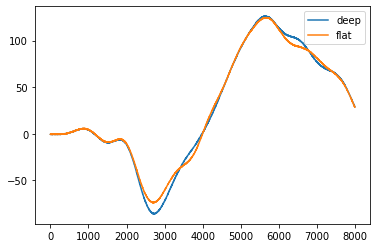

In [63]:
### plot simulations from artifical samples: L5 basket NMDA -> higher value should lead to deeper trough as reported by Jonson

plt.plot(deep_x[0], label='deep')
plt.plot(flat_x[0], label='flat')
plt.legend()

In [45]:
import functools
assert_equal = functools.partial(torch.testing.assert_close, rtol=0, atol=0)
assert_equal(flat_x, deep_x)

In [21]:
parameter_names = ["prox1_ampa_l2_bas","prox1_ampa_l2_pyr","prox1_ampa_l5_bas","prox1_nmda_l5_bas", "prox1_nmda_l5_pyr",
 "t_prox1",
 "dist_ampa_l2_pyr","dist_ampa_l2_bas","dist_nmda_l2_pyr",
 "dist_nmda_l5_pyr","dist_nmda_l2_bas",
 "t_dist", 
 "prox2_ampa_l2_pyr","prox2_ampa_l5_pyr","prox2_nmda_l2_pyr","prox2_nmda_l5_pyr",
 "t_prox2"]

if num_params ==6:
    parameter_names = ["prox_1_ampa_l2_pyr",
     "t_evprox_1",
     "dist_nmda_l2_pyr",
     "t_evdist_1", 
     "prox_2_ampa_l5_pyr",
     "t_evprox_2"]

In [37]:
##better limits:

list_min = torch.min(samples3, 0)[0]
list_max = torch.max(samples3, 0)[0]

print(list_min)

print(list_max)

diff = torch.abs(list_max - list_min) * 0.8

print(diff)

list_min = list(list_min - diff)
list_max = list(list_max + diff)

limits = [list(tup) for tup in zip(list_min, list_max)]

tensor([8.4771e-05, 1.1118e+02])
tensor([  0.5094, 162.0252])
tensor([ 0.4075, 40.6786])


In [25]:
limits = [list(tup ) for tup in zip(prior_min, prior_max)]

In [281]:
true_params

tensor([[2.7700e-01, 3.9900e-02, 6.2440e-01, 3.7390e-01, 0.0000e+00, 1.8977e+01,
         1.2000e-05, 1.1500e-02, 1.3400e-02, 7.6700e-02, 6.3370e-02, 6.3080e+01,
         4.6729e+00, 2.3300e+00, 1.6733e-02, 6.7900e-02, 1.2086e+02]])

<Figure size 432x288 with 0 Axes>

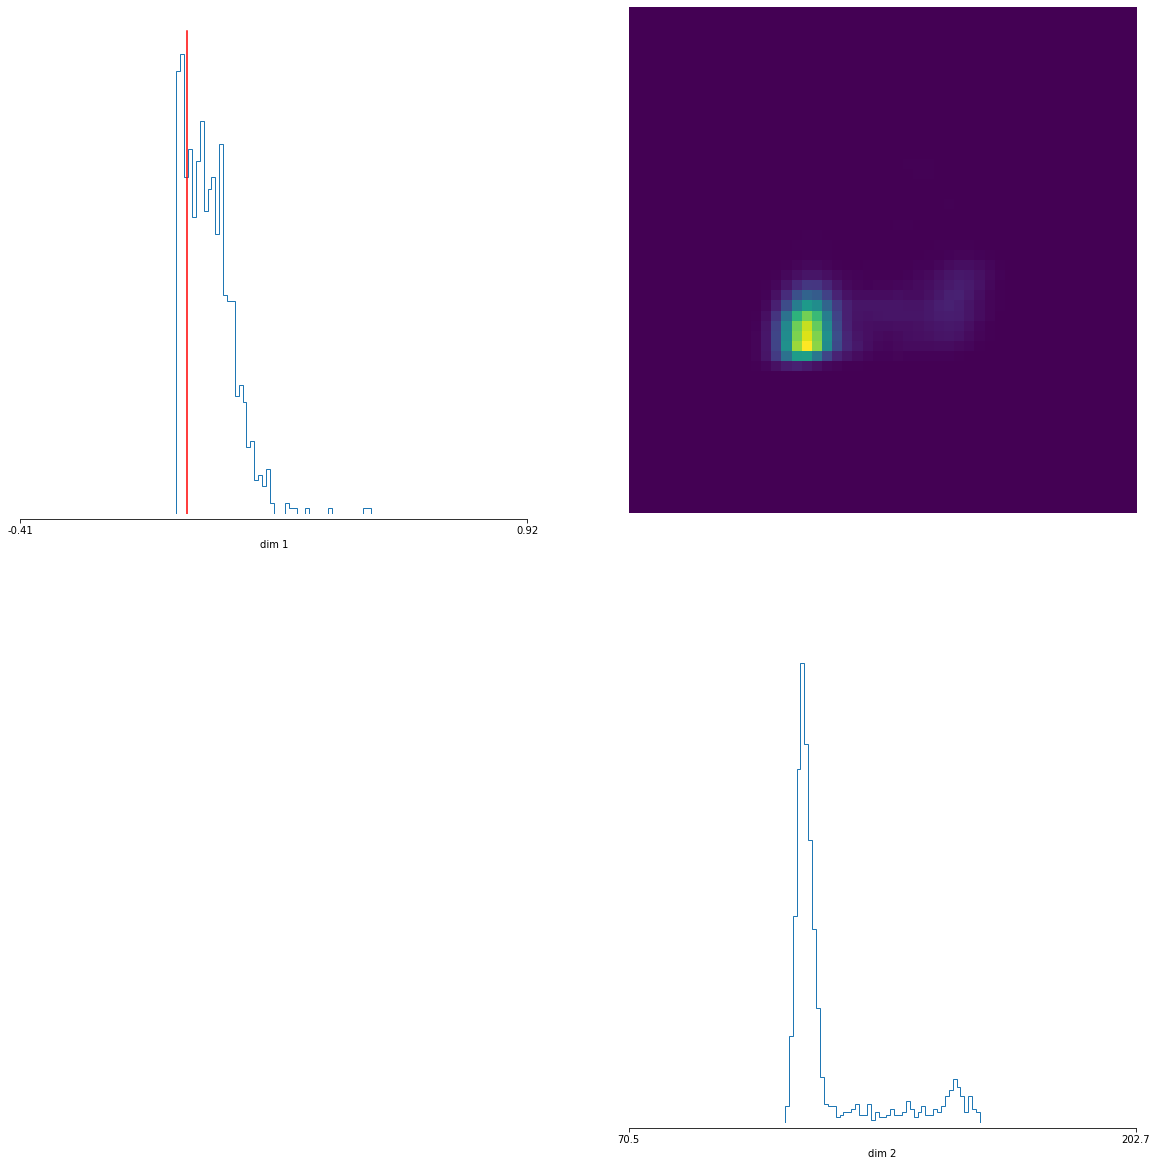

In [38]:
#limits = [list(tup) for tup in zip(prior_min, prior_max)]


plt.set_cmap('viridis')

fig, axes = analysis.pairplot(
    samples3,
    limits=limits,
    upper = 'kde',
    #subset=[5, 11, 16],
    ticks=np.round(limits,2),
    figsize=(20, 20),
    points=true_params,
    points_offdiag={"markersize": 15},
    points_colors="r",
    #labels=parameter_names,
)



#for i in range(5):
#    axes[i][i].xaxis.label.set_color('magenta')
#for i in range(5, 12):
#    axes[i][i].xaxis.label.set_color('navy')
#for i in range(12, 17):
#    axes[i][i].xaxis.label.set_color('deeppink')

In [271]:
posterior.set_default_x(obs_real_stat)

In [36]:
condition = posterior.sample((1,))
condition2 = posterior.sample((1,))


condition.shape

Drawing 1 posterior samples:   0%|          | 0/1 [00:00<?, ?it/s]

Drawing 1 posterior samples:   0%|          | 0/1 [00:00<?, ?it/s]

torch.Size([1, 6])

In [376]:
import torch
limits = torch.tensor([[-0.0024, 0.1151],
 [-0.0054, 0.0159],
 [0.4, 0.7],
 [0.2, 0.4],
 [0.0059, 0.0083],
 [18.1325, 25.2168],
 [1.7675e-05, 2.8060e-05],
 [0.0160, 0.0224],
 [0.0184, 0.0219],
 [0.0602, 0.1707],
 [0.1051, 0.1511],
 [61.5770, 64.2473],
 [2.0016, 5.2183],
 [-0.1, 2.6418],
 [0.0, 2.4874],
 [0.0,0.5605],
 [124.4529, 129.1378]])

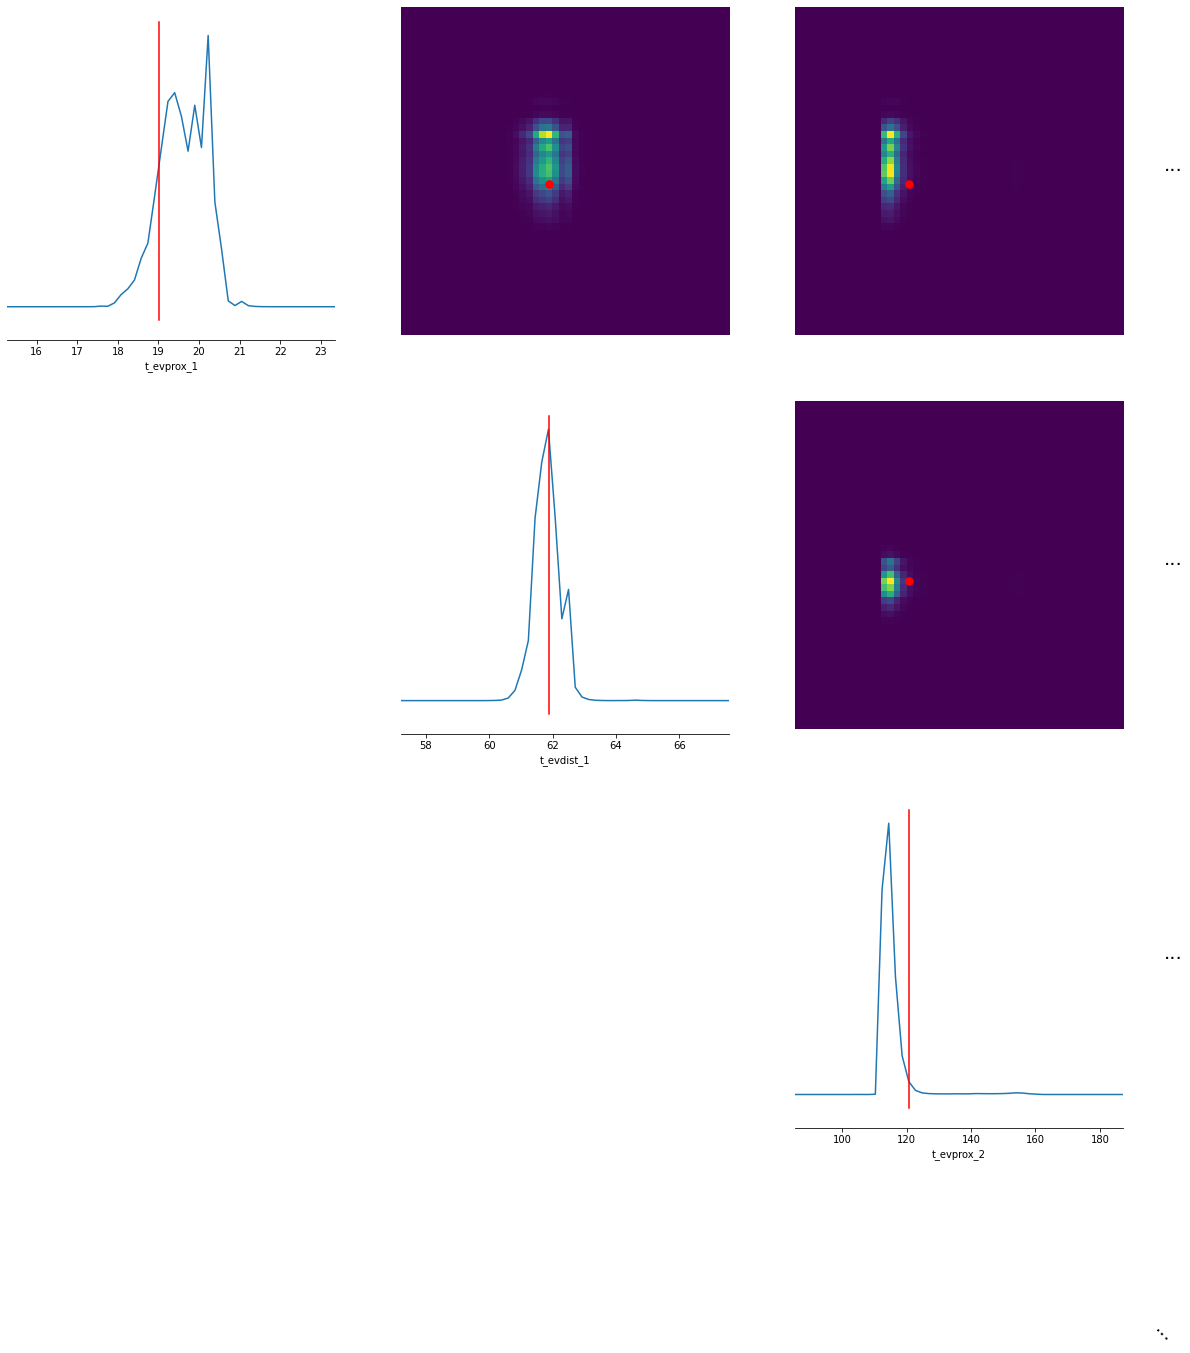

In [39]:


fig, ax = analysis.conditional_pairplot(
    density=posterior,
    condition=condition,
    limits=limits,
    figsize=(20, 20),
    points=true_params,
    upper = 'kde',
    points_offdiag={"markersize": 15},
    points_colors="r",
    labels=parameter_names,
    subset = [1, 3, 5]
    #color_map = ['Blues', 'Reds'],
    #alpha1 = 0.8,
    #alpha2 = 0.4

)




In [40]:
samples = posterior.sample((100,), x=obs_real_stat)

Drawing 100 posterior samples:   0%|          | 0/100 [00:00<?, ?it/s]

In [ ]:
s_x = inference.run_only_sim(samples, simulation_wrapper=sim_wrapper, num_workers=8)

early stop 200.0early stop 200.0early stop
 param size early stop200.0 
 
early stop200.0param size 6  
6early stop
early stopearly stopparam size  
200.0 200.0  6


param size param size  6200.0
 
200.0param size param size  6
 6
6

param size  6
joblib will run over 1 jobs
joblib will run over 1 jobsjoblib will run over 1 jobs

joblib will run over 1 jobs
joblib will run over 1 jobsjoblib will run over 1 jobsjoblib will run over 1 jobs


joblib will run over 1 jobs
[Parallel(n_jobs=8)]: Using backend MultiprocessingBackend with 8 concurrent workers.
Loading custom mechanism files from /home/ubuntu/miniconda3/envs/sbi_env/lib/python3.7/site-packages/hnn_core/mod/x86_64/.libs/libnrnmech.so
Building the NEURON model
Loading custom mechanism files from /home/ubuntu/miniconda3/envs/sbi_env/lib/python3.7/site-packages/hnn_core/mod/x86_64/.libs/libnrnmech.so
Building the NEURON modelLoading custom mechanism files from /home/ubuntu/miniconda3/envs/sbi_env/lib/python3.7/site-packages/hnn_core

In [ ]:
### sample from prior now
num_samples = 100
samples_prior = []


for i in range(num_samples):
    sample = prior.sample()
    samples_prior.append(sample)
    

In [ ]:
samples_prior[:][0].shape

In [ ]:
    
s_x_prior = inference.run_only_sim(samples_prior, sim_wrapper, num_workers=8)

In [ ]:
for i in range(100):
    plt.plot(s_x_prior[i], color='orange', alpha=0.6)
    
for i in range(100):
    plt.plot(s_x[i], color='blue', alpha=0.1)

In [ ]:
s_x_torch = torch.stack(([s_x[i] for i in range(len(s_x))]))
s_x_prior_torch = torch.stack(([s_x_prior[i] for i in range(len(s_x_prior))]))


mean = torch.mean(s_x_torch, 0)
std = torch.std(s_x_torch, 0)

mean_prior = torch.mean(s_x_prior_torch, 0)
std_prior = torch.std(s_x_prior_torch, 0)

lower = mean - 1.96 * std


upper = mean + 1.96 * std


lower_prior = mean_prior - 1.96 * std_prior


upper_prior = mean_prior + 1.96 * std_prior



In [ ]:
import seaborn as sns

sns.set() 

sns.set_style("whitegrid", {'axes.grid' : False})
#sns.set_style('ticks')

fig1, ax = plt.subplots(1, 1)
#ax.set_title("Comparing signal")

    
plt.plot(mean, color ='blue', label='mean of posterior')

for s in s_x:
    plt.plot(s, alpha=0.05, color='blue')
    #plt.ylim(-30,30)
    plt.xlim(0, 7000)

plt.plot(lower, color='blue', linestyle='dashed', label='95% confidence')
plt.plot(upper, color='blue', linestyle='dashed')
plt.fill_between(x= torch.arange(len(mean_prior)), y1=lower, y2=upper, color='blue', alpha=0.1)
plt.xlim(0, 7000)


plt.plot(mean_prior, color ='orange', label='mean of prior')


for x_w in s_x_prior:
    plt.plot(x_w, alpha=0.05, color='orange')

plt.plot(lower_prior, color='orange', linestyle='dashed', label='95% confidence')
plt.plot(upper_prior, color='orange', linestyle='dashed')
plt.fill_between(x= torch.arange(len(mean_prior)), y1=lower_prior, y2=upper_prior, color='orange', alpha=0.2)
plt.xlim(0, 7000)

plt.xlabel('time in ms')
#plt.ylabel('voltage ()')

fig1.gca().set_ylabel(r'voltage ($\mu V$)')
    
plt.plot(obs_real[0], label='Ground truth', color='red')



plt.legend()

## Correlation matrices

In [ ]:
corr_matrix_marginal = np.corrcoef(samples.T)
fig, ax = plt.subplots(1,1, figsize=(4, 4))
im = plt.imshow(corr_matrix_marginal, clim=[-1, 1], cmap='PiYG')
_ = fig.colorbar(im)

In [ ]:
condition = posterior.sample((1,))

cond_coeff_mat = conditional_corrcoeff(
    density=posterior,
    condition=condition,
    limits=torch.tensor([[-2., 2.]]*17),
)

fig, ax = plt.subplots(1,1, figsize=(4,4))
im = plt.imshow(cond_coeff_mat, clim=[-1, 1], cmap='PiYG')
_ = fig.colorbar(im)

## Looking at correlations of parameters

In [ ]:
## parameter 3 and 4 should be highly correlated:

## Evaluation of features

In [8]:
import matplotlib.cm as cm
import re
from mpl_toolkits.axes_grid1 import make_axes_locatable
from torch import Tensor
from typing import Tuple, List, Optional, Dict
from matplotlib.pyplot import Axes
from matplotlib.figure import Figure
from matplotlib.colors import LogNorm


In [83]:
t = obs_real_stat

t

tensor([[ 6.9800e+02,  2.6790e+03,  5.5510e+03,  5.0662e+00, -9.2767e+01,
          1.1571e+02,  3.0405e+00,  2.9002e+01,  1.1269e+02,  3.5632e+00,
          4.9754e+03,  6.3653e+00,  1.9096e+00, -1.1660e+01, -1.0371e+01,
         -1.5394e+01, -3.4815e+01, -6.5808e+01,  3.7142e+01]],
       dtype=torch.float64)

In [84]:
# t.shape

t1 = torch.cat((t[:,:1], t[:,1+1:]), axis = 1)
print(t1)
t1.shape

tensor([[ 6.9800e+02,  5.5510e+03,  5.0662e+00, -9.2767e+01,  1.1571e+02,
          3.0405e+00,  2.9002e+01,  1.1269e+02,  3.5632e+00,  4.9754e+03,
          6.3653e+00,  1.9096e+00, -1.1660e+01, -1.0371e+01, -1.5394e+01,
         -3.4815e+01, -6.5808e+01,  3.7142e+01]], dtype=torch.float64)


torch.Size([1, 18])

In [85]:
posterior.set_default_x(obs_real_stat)

In [86]:
thetas = posterior.sample((10000,))
thetas.shape

Drawing 10000 posterior samples:   0%|          | 0/10000 [00:00<?, ?it/s]

torch.Size([10000, 17])

In [89]:

for i in range(19):
    x = calculate_summary_stats_temporal(x_without)
    #leaving one summary statistic out
    x_c = torch.cat((x[:,:i], x[:,i+1:]), axis = 1)
    print(x_c.shape)
    print('t shape', t.shape)
    print(torch.cat((t[:i], t[i+1:]), axis = 0).shape)
    inf = SNPE(prior=prior, density_estimator = 'nsf')
    inf = inf.append_simulations(thetas, x_c)
    density_estimator = inf.train()
    posterior1 = inf.build_posterior(density_estimator)
    globals()['samples_%s' % i] = posterior1.sample((num_samples,), x=torch.cat((t[:,:i], t[:,i+1:]), axis = 1))


batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch sh

AssertionError: Number of parameter sets (=10000 must match the number of simulation outputs (=19000)

In [13]:
sum_stats_names =                                [
                    'arg_p50',
                    'arg_N100',
                    'arg_P200',
                    'p50',
                    'N100',
                    'P200',
                    'p50_moment1',
                    'N100_moment1',
                    'P200_moment1',
                    'p50_moment2',
                    'N100_moment2',
                    'P200_moment2',
                    'mean1000',
                    'mean1500',
                    'mean1700',
                    'mean1900',
                    'mean2100',
                    'mean2300',
                    'mean4000',
                ]

sample_list = []
for i in range(len(sum_stats_names)):
    sample_list.append(globals()['samples_%s' % i] )

    
plt.figure(figsize = (25,20))
im = plot_varchanges(sample_list, samples, xticklabels=sum_stats_names, yticklabels= parameter_names, plot_label='', batchsize=0)
plt.show(im)

KeyError: 'samples_0'

In [90]:
sample_batch = []
batch_size = 5

for i in range(batch_size):

    sample_list = []
    
    for i in range(19):
        

        x = calculate_summary_stats_temporal(x_without)
        #leaving one summary statistic out
        x_c = torch.cat((x[:,:i], x[:,i+1:]), axis = 1)
        print(x_c.shape)
        print('t shape', t.shape)
        print(torch.cat((t[:i], t[i+1:]), axis = 0).shape)
        inf = SNPE(prior=prior, density_estimator = 'nsf')
        inf = inf.append_simulations(thetas, x_c)
        density_estimator = inf.train()
        posterior1 = inf.build_posterior(density_estimator)
        globals()['samples_%s' % i] = posterior1.sample((num_samples,), x=torch.cat((t[:,:i], t[:,i+1:]), axis = 1))
        
        sample_list.append(globals()['samples_%s' % i] )
        
    sample_batch.append(sample_list)

batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch sh

AssertionError: Number of parameter sets (=10000 must match the number of simulation outputs (=19000)

In [119]:
sample_batch

[]

/home/ubuntu/miniconda3/envs/sbi_env/lib/python3.7/site-packages/ipykernel_launcher.py:14: UserWarning: FixedFormatter should only be used together with FixedLocator
  


Text(0, 0.5, 'voltage ($\\mu V$)')

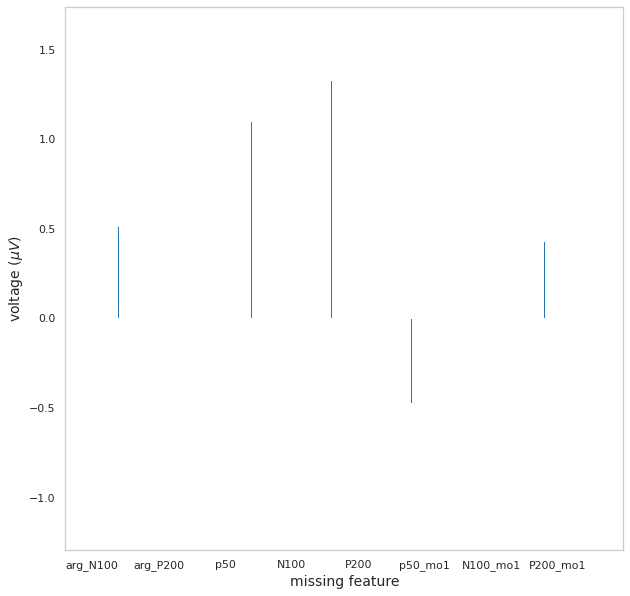

In [117]:
fig, axes = plt.subplots(1, 1, figsize=(10, 10), sharex=True)


plot_KLs(sample_list,
        samples,
        idx=0,
        batchsize=0,
         kind='bar',
        agg_with='mean'
    )


axes.set_xlabel("missing feature", size=14)
axes.set_xticklabels(sum_stats_names)
ax.tick_params(axis="both", which="major", labelsize=12)
ylabel = ax.get_ylabel()
axes.set_ylabel(ylabel, size=14)


## Histograms

In [39]:
s_x_prior_stat = calculate_summary_stats_temporal(s_x_prior_torch)

s_x_stat = calculate_summary_stats_temporal(s_x_torch)

batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch sh

In [52]:
s_x_prior_stat.shape

torch.Size([100, 19])

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18


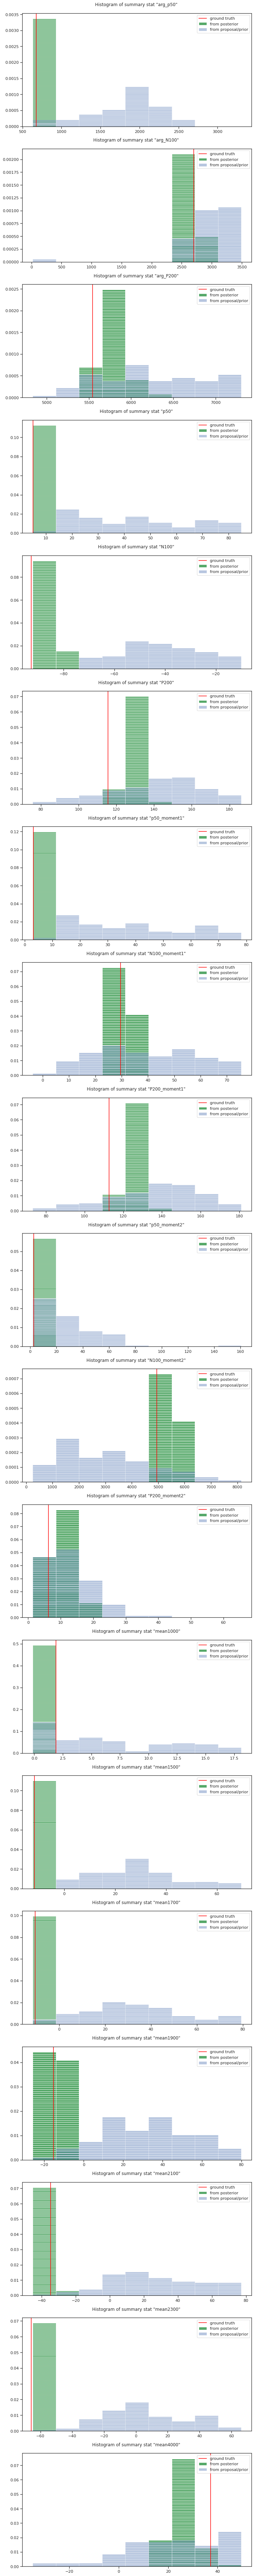

In [93]:
import matplotlib.gridspec as gridspec


import seaborn as sns
#sns.set_style("whitegrid")
#sns.set_style("dark")
#sns.set_style("white")
sns.set_style("ticks")



fig = plt.figure(figsize=(10,100), tight_layout=True)

gs = gridspec.GridSpec(nrows=len(sum_stats_names), ncols=1)



#fig.suptitle('Summary stats histogram from posterior predictions.', y=0.2, fontsize=16)


for i in range(19):
    
    print(i)

    globals()['ax%s' % i] = fig.add_subplot(gs[i])

    globals()['sum_stats%s' % i] = []
    globals()['x%s' % i] = []

    for j in range(s_x_prior_stat.shape[0]):
        globals()['sum_stats%s' % i].append(s_x_stat[j][i])
        globals()['x%s' % i].append(s_x_prior_stat[j][i])

    sum_stat = globals()['sum_stats%s' % i]
    x_s = globals()['x%s' % i]

    ##define bins such that we get an equal number of bins at the end
    
    binsteps = np.abs(max([max(x_s), max(sum_stat)])-min([min(x_s), min(sum_stat)]))*0.1 
    
   
    binrange = np.arange(min([min(x_s), min(sum_stat)]), max([max(x_s), max(sum_stat)]), binsteps)
  

   
    
    globals()['ax%s' % i].hist(globals()['sum_stats%s' % i],  density=True, bins=binrange, facecolor='g', alpha=0.99, histtype='barstacked', label='from posterior')
    globals()['ax%s' % i].hist(globals()['x%s' % i],  density=True, bins=binrange, facecolor='b', alpha=0.4, histtype='barstacked', label='from proposal/prior')
    
  
    globals()['ax%s' % i].set_title('Histogram of summary stat "{}" '.format(sum_stats_names[i]), pad=20)
    #ax0.set(ylim=(-500, 7000))

    globals()['ax%s' % i].axvline(obs_real_stat[0][i].detach().numpy(), color='red', label='ground truth')
    globals()['ax%s' % i].legend(loc='upper right')

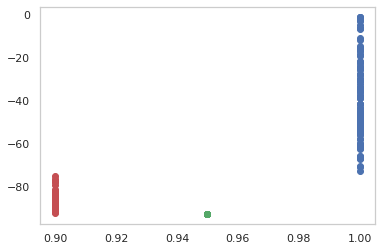

In [89]:
for i in range(100):

    plt.scatter(1,s_x_prior_stat[i][4], color='b')
    plt.scatter(0.9,s_x_stat[i][4], color='r')
    plt.scatter(0.95, obs_real_stat[0][4], color='g')

In [71]:
obs_real_stat[0][0]

tensor(677.)

In [94]:
from sbi.analysis.sbc import check_sbc, run_sbc, get_nltp
from sbi.analysis.plot import sbc_rank_plot
from sbi.inference import SNPE, SNPE_C, prepare_for_sbi, simulate_for_sbi
from sbi.simulators import linear_gaussian, diagonal_linear_gaussian

ModuleNotFoundError: No module named 'sbi.analysis.sbc'